# Backpropagation

[참고자료] David E. Rumelhart, Geoffrey E. Hinton & Ronald J. Williams,  Learning representations by back-propagating <br> $\qquad \quad \ \ $ errors, Nature, volume 323, pages533–536, 1986


- Deep Neural Network에 포함된 $w_{i,j}^{(l)}$의 최적해를 구하기 위한 방법

## 1. Deep Neural Network의 핵심개념 

### 1.1 Deep Neural Network의 구조

Notation | $\qquad \quad$ 설명
:----:|:----
$$L$$ | $\bullet \ $ Hidden layer 수
$$z_i^{(1)}$$ | $\bullet \ $ Input layer의 $i^{th}$ node
$$w_{i,j}^{(l)}$$ | $\bullet \ $ $l^{th}$ hidden layer에서 $i^{th}$ node $z_i^{(l)}$와 $j^{th}$ node $y_j^{(l)}$를 선형연결하기 위해 사용하는 parameter
$$y_j^{(l)}$$ | $\bullet \ $ $l^{th}$ hidden layer에서 $n_{l-1}$개의 $z_i^{(l)}$들을 선형변환한 결과 $$ y^{(l)}=W^{(l)}z^{(l)}$$
$$\sigma^{(l)} \left( y_j^{(l)} \right)$$ | $\bullet \ $ $l^{th}$ hidden layer에서 $y_j^{(l)}$을 비선형변환하는 activation function
$$z_j^{(l+1)}$$ | $\bullet \ $ $l^{th}$ hidden layer에서 $y_j^{(l)}$들을 $\sigma^{(l)}$ activation function을 이용하여  비선형변환한 결과 $$ z^{(l+1)}=\sigma^{(l)} \left( y^{(l)} \right)$$

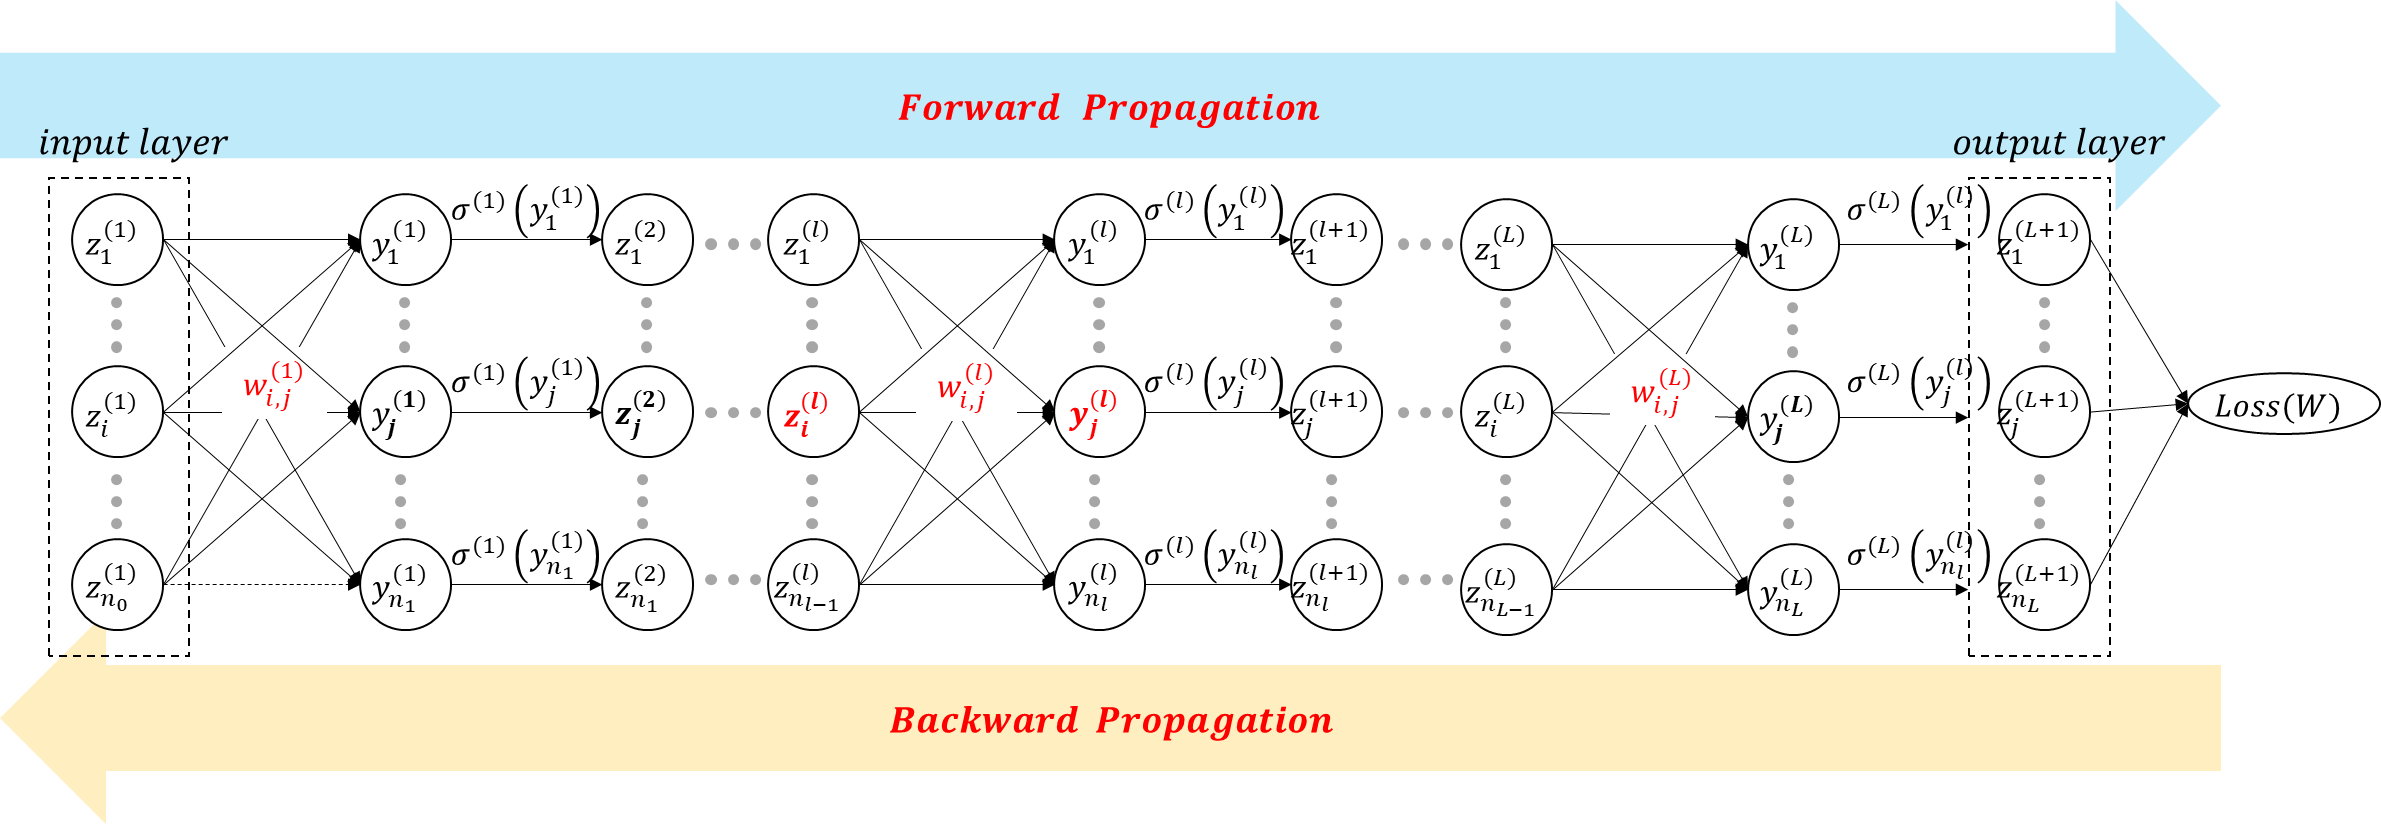

- 순전파: $Forward \ Propagation$ <br>
>$ \ \ $ $\checkmark \ $ Input data $z^{(1)}$을  Deep Neural Network에 input한 후 <br> 
>$ \ \ $ $\checkmark \ $ Input $z^{(1)}$을 Parameter $w_{i,j}^{(l)}$을 이용한 선형변환과 $\sigma^{(l)}$을 이용한 비선형변환하여 (Deep Neural  <br> $\quad \ \ $ Network의 hidden layer들을 따라) $Loss(W)$를 계산하는 과정  <br> 
>$ \quad $ $\cdots \ $ 계산 결과 $\hat y = z^{(L+1)}$은 Label $y$의 근사값임<br>
>$ \quad $ $\cdots \ $ $\hat y$와 Label $y$를 이용하여  선택된 Loss function $Loss(W)$을 활용하여  Loss값을 구할 수 있음<br>


- 역전파: $Backward \ Propagation$ <br>
>$ \ \ $ $\checkmark \ $ Loss function인 $Loss(W)$를 최소화하는  $w_{i,j}^{(l)*}$를 구하기 위해 <br>
>$ \ \ $ $\checkmark \ $ 합성함수의 미분인 Chain Rule을 이용하여  $Loss(W)$를 최소화하는  parameter $w_{i,j}^{(l)}$의 최적값  <br> $\quad \ \ $  $w_{i,j}^{(l)*}$을 찾는 과정

### 1.2 입력 vector $z^{(1)} $

- $z^{(1)} \in R^{n_{_0}}$인 vector <br>
$ \ \ $ $\checkmark \ $ Deep Neural Network에 input되는 vector $z^{(1)}$은 vector여야함<br>
$ \ \ $ $\checkmark \ $ 만일 vector가 아닌 input을 고려해야한다면 vector로 변환하는 과정을 거쳐야함<br>

$$
z^{(1)}= \left( z_1^{(1)}, z_2^{(1)}, \cdots, z_{n_{_0}}^{(1)} \right)
$$

### 1.3 선형변환

- Input vector $z^{(1)}$을 포함하여  모든 Hidden Layer의 Input $z^{(l)}$은 $y^{(l)}$로 선형변환됨 


$$
\begin{align}
y_j^{(l)} =& \sum_{k=0}^{n_{l-1}} w_{kj}^{(l)} z_k^{(l)} + \varepsilon_j^{(l)}  \\
          =& z^{(l)}w_{j}^{(l)} + \varepsilon_j^{(l)}, j=1, \cdots , n_l, l=1, \cdots, L \\\\
  y^{(l)} =& W^{(l)}z^{(l)} +  \varepsilon_j^{(l)}
\end{align}
$$

$\qquad  \checkmark \ $ 위의 식에서 $\Sigma$의 시작이 0부터 인 이유는 bias 항을 포함시켰기 때문임

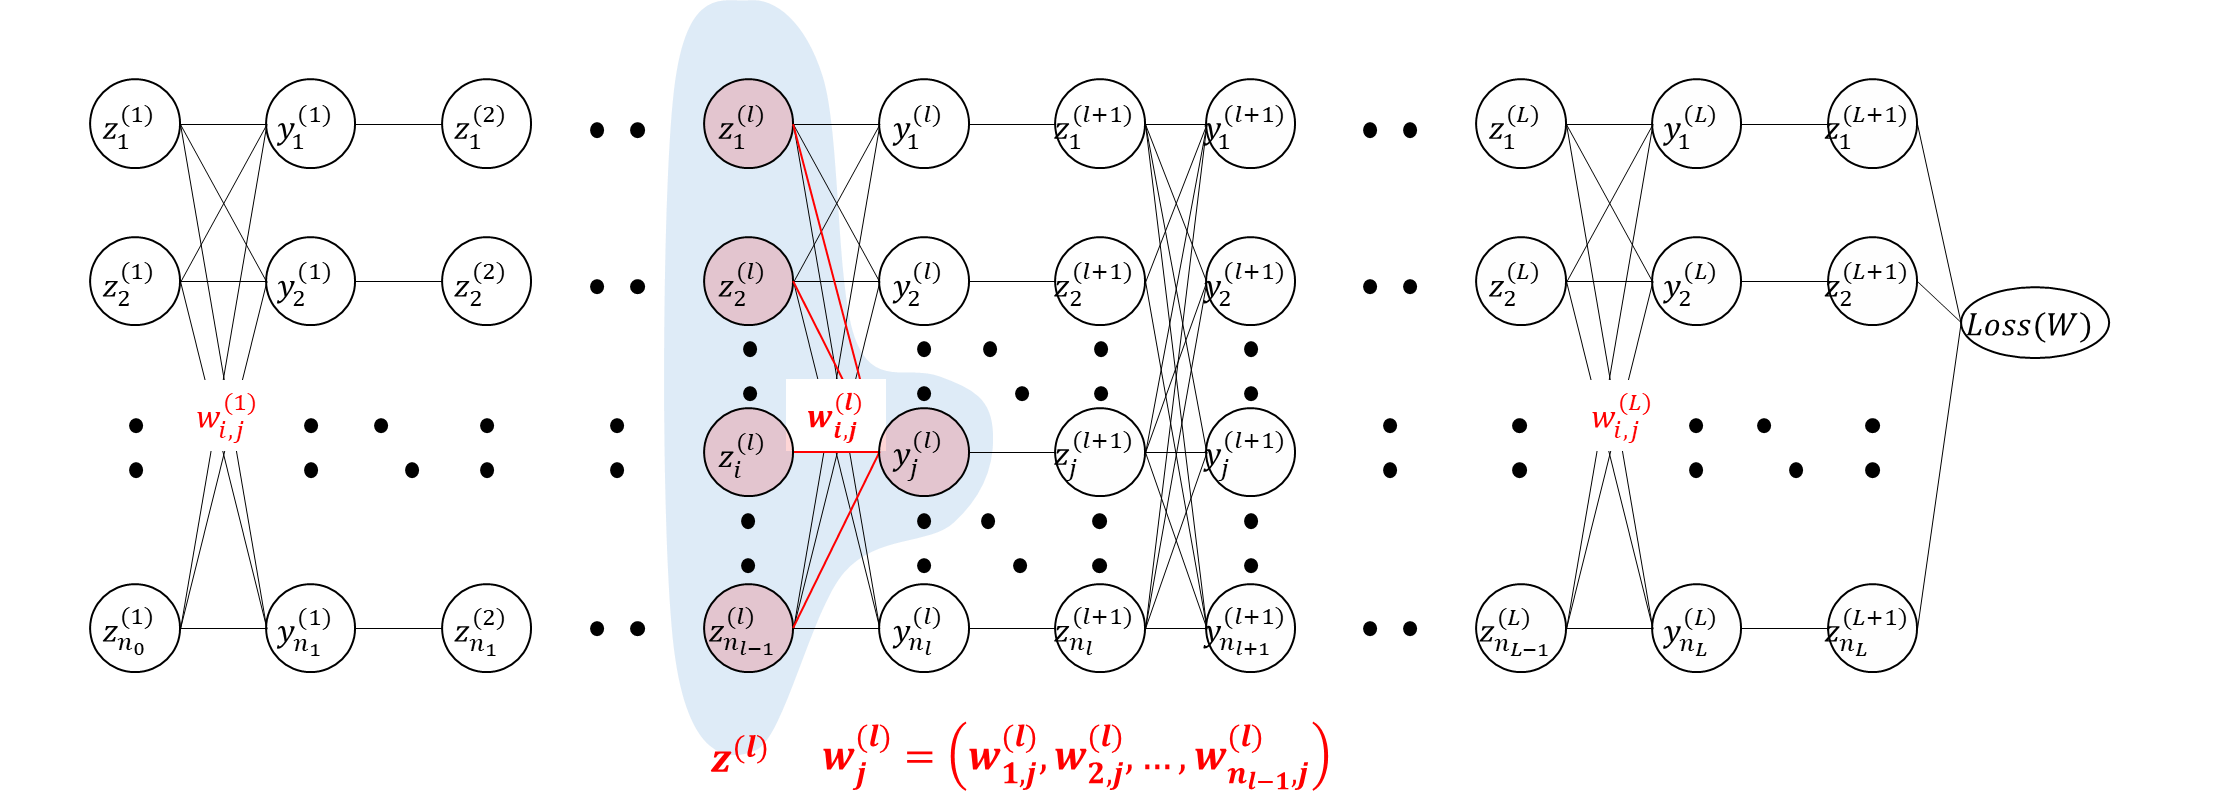

#### (1) Parameter  $w_{i,j}^{(l)}$들 추정치

- Parameter $w_{i,j}^{(l)}$들의 추정치들은 $Loss(W)$를 최소화하는 $w_{i,j}^{(l)*}$들을 말함<br>
$ \ \ $ $\checkmark \ $ $Loss$를 최소화하는 $w_{i,j}^{(l)*}$들은 다음 성질을 만족하는 $w_{i,j}^{(l)}$들임

$$
\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)} } = 0
$$

- $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)} } = 0$을 만족하는 $w_{i,j}^{(l)*}$는 탐색적 방법인  $Gradient \ Descent$ 방법을 이용하여 찾음

$$
w_{i,j}^{(l)} = w_{i,j}^{(l)} - \rho \left( \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}} \right)
$$

$\qquad$ 여기서 $\rho$는 매우 작은 양의 값을 가지는 학습률(learning rate)임

#### (2) 선형변환 값 $y_{j}^{(l)}$의 추정치

- 선형변환 $y_j^{(l)}$의 추정치 $\hat y_j^{(l)}$는  parameter $w_{i,j}^{(l)}$들의 추정치$\hat w_{i,j}^{(l)}$를 이용하여 계산

$$
\begin{align}
\hat y_j^{(l)} =& \sum_{k=1}^{n_{l-1}} \hat w_{k,j}^{(l)} z_k^{(l)},  \ \ i=1, ..., n_l, \ \ l=1, ..., L \\
\hat y^{(l)} =& \hat W^{(l)}z^{(l)} , \ \ l=1, ..., L 
\end{align}
$$

### 1.4 Activation function을 이용한 비선형변환

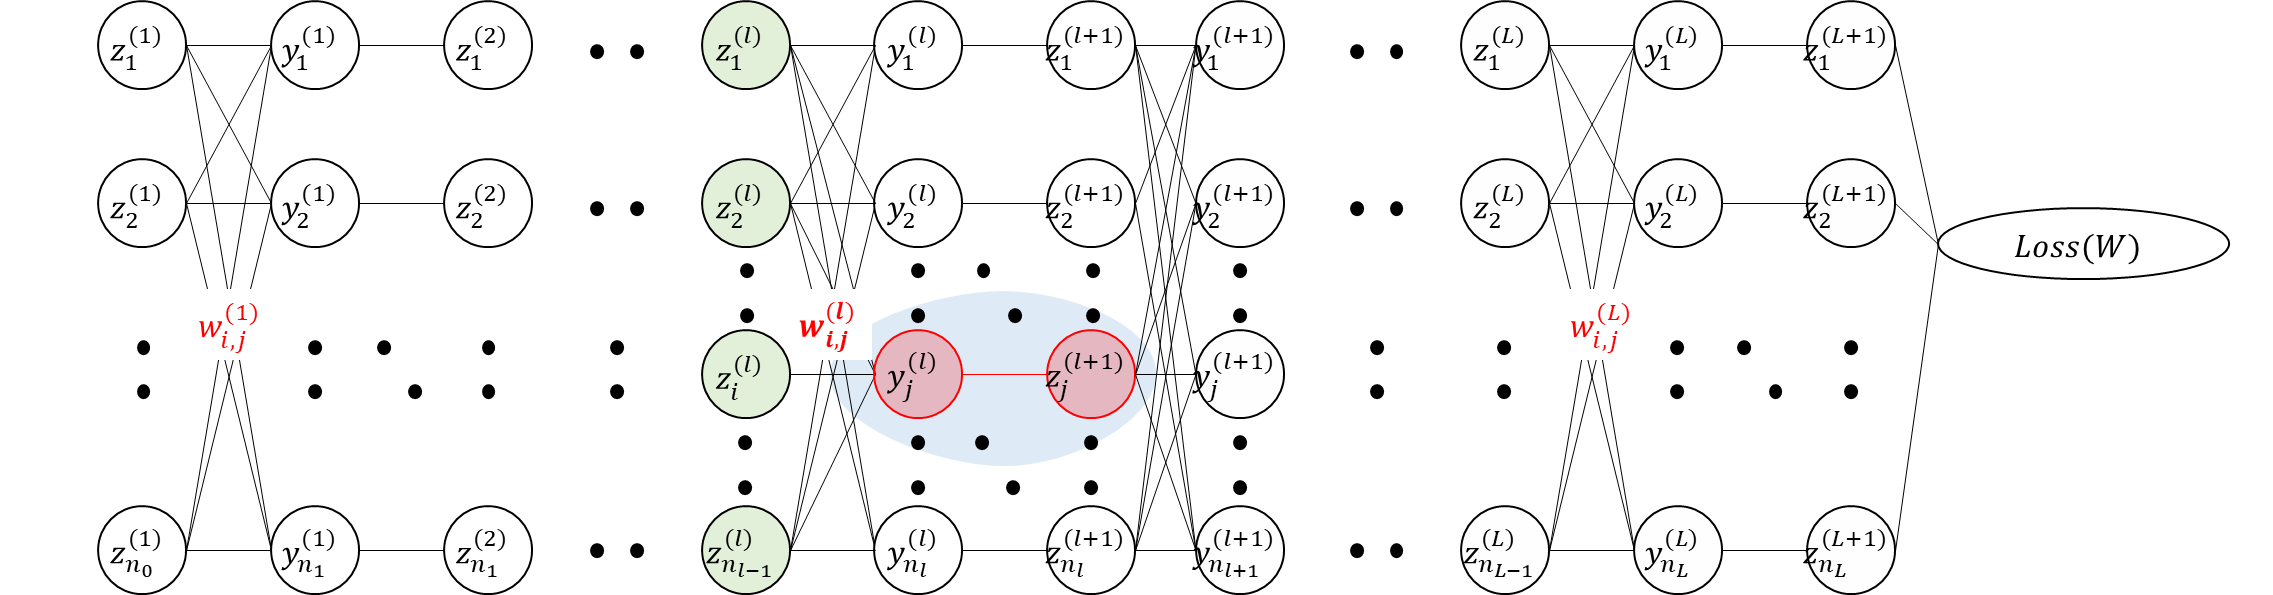

- 선형변환된 $y_j^{(l)}$들을 다음과 같이 Activation Function  $\sigma^{(l)}$을 Componentwise로 적용하여 비선형변환함

$$
z_j^{(l+1)} = \sigma^{(l)} \left( y_j^{(l)}  \right)
$$

- 대표적인 Activation Function에는 $ReLU$, $Sigmoid$, $tanh$, $Softmax$등이 있음

### 1.5 선형변환과 비선형 변환의 반복

- <span style="color:red">Deep Neural Network은 Network구조를 이용하여 선형변환과 비선형변환을 반복하여  Approximation하는 방법임</span><br>
$ \ \ $ $\checkmark \ $ $L$개의 Hidden Layer를 가지고   $l^{th}$ Hidden Layer 에 $n_l$개의 Node $y_j^{(l)}$가 있는 Deep Neural Network을 이용하여 Approximation한  <br> $\quad \ \ \ $ Output은 다음과 같이 표현할 수 있음

$$
y = z^{(L+1)} = \sigma^{(L)}W^{(L)}  \cdots \sigma^{(1)}W^{(1)}z^{(1)} + \varepsilon
$$

- $w_{i,j}^{(l)}$의 최적해가 구해지면 Forward Network을 이용하여 output 근사치 $\hat y$를 다음과 같이 구할 수 있음

$$
\hat y = \hat z^{(L+1)} =  \sigma^{(L)} \hat W^{(L)}  \cdots \sigma^{(1)} \hat W^{(1)} \left( z^{(1)} \right) 
$$

### 1.6 Loss function

- Deep Neural Network을 이용한 Approximation이 적절히 잘 수행되었는지는 $Loss \ function$을 이용하여 평가함
- Regression문제인 경우: MSE <br>
$ \ \ $ $\checkmark \ $ $y$를 Label이라고 하자

$$
\begin{align}
Loss(W) =& MSE \\
        =& \frac{1}{n}\sum_{i=1}^{n} \left( y_i - \hat y_i \right)^2
\end{align}
$$

- Classification문제인 경우 CrossEntropy $CE$를 사용함 <br>
$ \ \ $ $\checkmark \ $ $p$를 Label $y$의 확률분포함수, $q$를 Deep Neural Network의 Output의 확률분포라고할 때, $CrossEntropy$ Loss는 다음과 같음

$$
\begin{align}
Loss(W) &= CE_{p(y)} \left( q \left( \hat y \right) \right) \\
        &= E_{p(y)} \left[ log \left( \frac{1}{ q \left( \hat y \right)} \right) \right]  \\
        &= - E_{p(y)} \left[ log q \left( \hat y \right) \right]          \\
        &=  - \sum_{c \in \mathcal{C}} log \left( q \left( \hat y_c \right) \right)  p \left( y_c \right)
\end{align}
$$

## 2. Deep Neural Network과 미분

### 2.1 다양한 함수의 미분

#### (1) Power function의 미분
-  $f(y) = y^n$의 미분<br>
$$f'(y) = \frac{df(y)}{dy} = ny^{n-1}$$

#### (2) Exponential function의 미분
- 자연상수 $ e = \underset{n \rightarrow \infty}{lim} \left(1+\frac{1}{n} \right)^{n} =2.71828 \ 18284 \ 59045 \ 23536 \ 02874 \cdots $  <br>
- $f(y) = e^y$의 미분<br>
$$f'(y) = \frac{df(y)}{dy} = e^{y}$$

#### (3) 분수함수의 미분
- $\frac{f(y)}{g(y)}$의 미분<br>
$$\frac{d}{dy} \left( \frac{f(y)}{g(y)} \right)   =  \frac{f'(y) \times g(y) - f(y) \times g'(y)}{ (g \left(y) \right)^2 } $$

#### (4) 삼각함수의 미분

- 먼저 $Sine$함수와 $Cosine$함수의 모양을 보자<br>
$ \ \ $ $\checkmark \ $ Sine함수를 $\pi/2$만큼 이동하면 Cosine함수와 일치한다는 것이 보이는가?

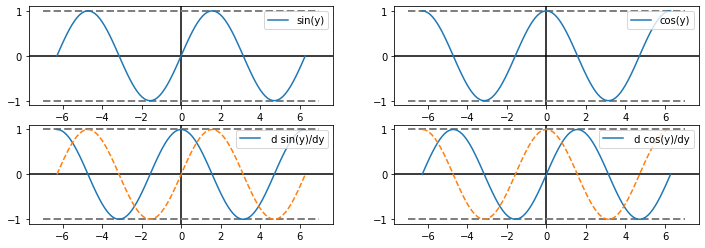

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
    
y_set = np.linspace(-2.0*np.pi, 2.0*np.pi, num=100)
siny = np.sin(y_set)
cosy = np.cos(y_set)
dsiny = np.sin(y_set + np.pi/2)
dcosy = - np.cos(y_set + np.pi/2)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.hlines(-1.0, -7.0, 7.0, color='gray', linestyle='--', linewidth=2)
ax1.hlines( 1.0, -7.0, 7.0, color='gray', linestyle='--', linewidth=2)
ax1.plot(y_set, siny, label="sin(y)")
ax1.legend(loc='upper right')

ax2.axvline(x=0, color = 'k') # draw x =0 axes 
ax2.axhline(y=0, color = 'k') # draw y =0 axes
ax2.hlines(-1.0, -7.0, 7.0, color='gray', linestyle='--', linewidth=2)
ax2.hlines( 1.0, -7.0, 7.0, color='gray', linestyle='--', linewidth=2)
ax2.plot(y_set, cosy, label="cos(y)")
ax2.legend(loc='upper right')

ax3.axvline(x=0, color = 'k') # draw x =0 axes 
ax3.axhline(y=0, color = 'k') # draw y =0 axes
ax3.hlines(-1.0, -7.0, 7.0, color='gray', linestyle='--', linewidth=2)
ax3.hlines( 1.0, -7.0, 7.0, color='gray', linestyle='--', linewidth=2)
ax3.plot(y_set, dsiny, label=" d sin(y)/dy")
ax3.plot(y_set, siny, linestyle='--')
ax3.legend(loc='upper right')

ax4.axvline(x=0, color = 'k') # draw x =0 axes 
ax4.axhline(y=0, color = 'k') # draw y =0 axes
ax4.hlines(-1.0, -7.0, 7.0, color='gray', linestyle='--', linewidth=2)
ax4.hlines( 1.0, -7.0, 7.0, color='gray', linestyle='--', linewidth=2)
ax4.plot(y_set, dcosy, label=" d cos(y)/dy")
ax4.plot(y_set, cosy, linestyle='--')
ax4.legend(loc='upper right')

plt.show()

- $sin(y)$과 $cos(y)$의 미분<br>
$$\frac{dsin(y)}{dy} =  cos(y) $$
<br>
$$\frac{dcos(y)}{dy} =  -sin(y) $$
- $tan(y)$의 미분<br>
$$
\frac{dtan(y)}{dy} = \frac{d}{dy} \left( \frac{siny}{cosy} \right) 
= \frac{sin'y cosy - siny cos'y}{cos^2y}
= \frac{cos^2y+sin^2y}{cos^2y}
= \frac{1}{cos^2y}
$$ <br>

$\qquad$ $\checkmark \ $ Sine함수를 미분하면 $\pi/2$ 만큼 평행이동한 결과와 같다는 것이 확인되는가?<br>
$\qquad$ $\checkmark \ $ Cosine함수를 미분하면 어떻게 변한 것인가?

#### (5) 합성함수의 미분

- 2개의 함수 $y=f(x)$와 $z=g(y)$가 미분 가능할 때, 합성함수 $z=g(y)=g( f(x) )$의 미분함수$\frac{dz}{dx}$ 다음과 같이 같단히 구할 수 있음 

<span style="color:blue">
$$
\frac{dz}{dx} = \frac{dy}{dx} \ \times \  \frac{dz}{dy} 
$$
</span>

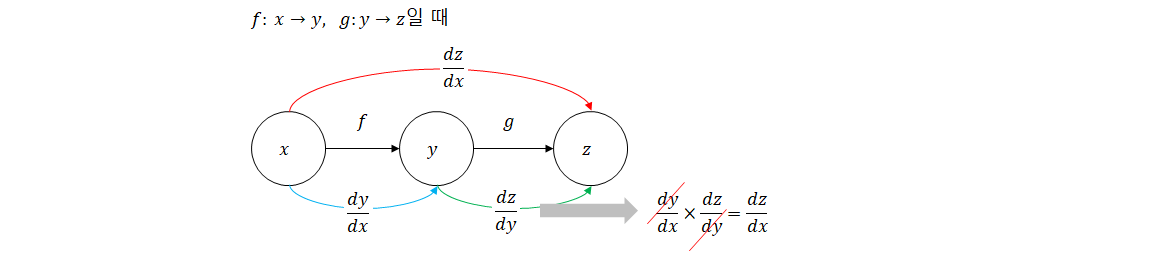

$\qquad$ $\checkmark \ $ 함수변환이 여러번 있는 함성함수도 같은 방법으로 미분값을 구할 수 있음<br>
$\qquad \quad$ $\cdots \ $ <span style="color:red">Deep Neural Network에서 $w_{i,j}^{(l)}$이 $Loss(W)$에 미치는 영향은 여러 번의 선형변환과 비선형변환을  거쳐 계산될 수 있음</span><br>


$$
w_{i,j}^{(l)} \ \underset{선형변환}{\longrightarrow} \  y_{j}^{(l)} \ \underset{비선형변환}{\longrightarrow} \  z_{j}^{(l+1)} \ \underset{선형변환}{\longrightarrow} \  ... \ \underset{비선형변환}{\longrightarrow} \  Loss(W)
$$

### 2.2 Deep Neural Network의 선형변환과 미분

- $w_{i,j}^{(l)}$이 $Loss(W)$에 미치는 형향을 Network으로 보면 다음과 같음

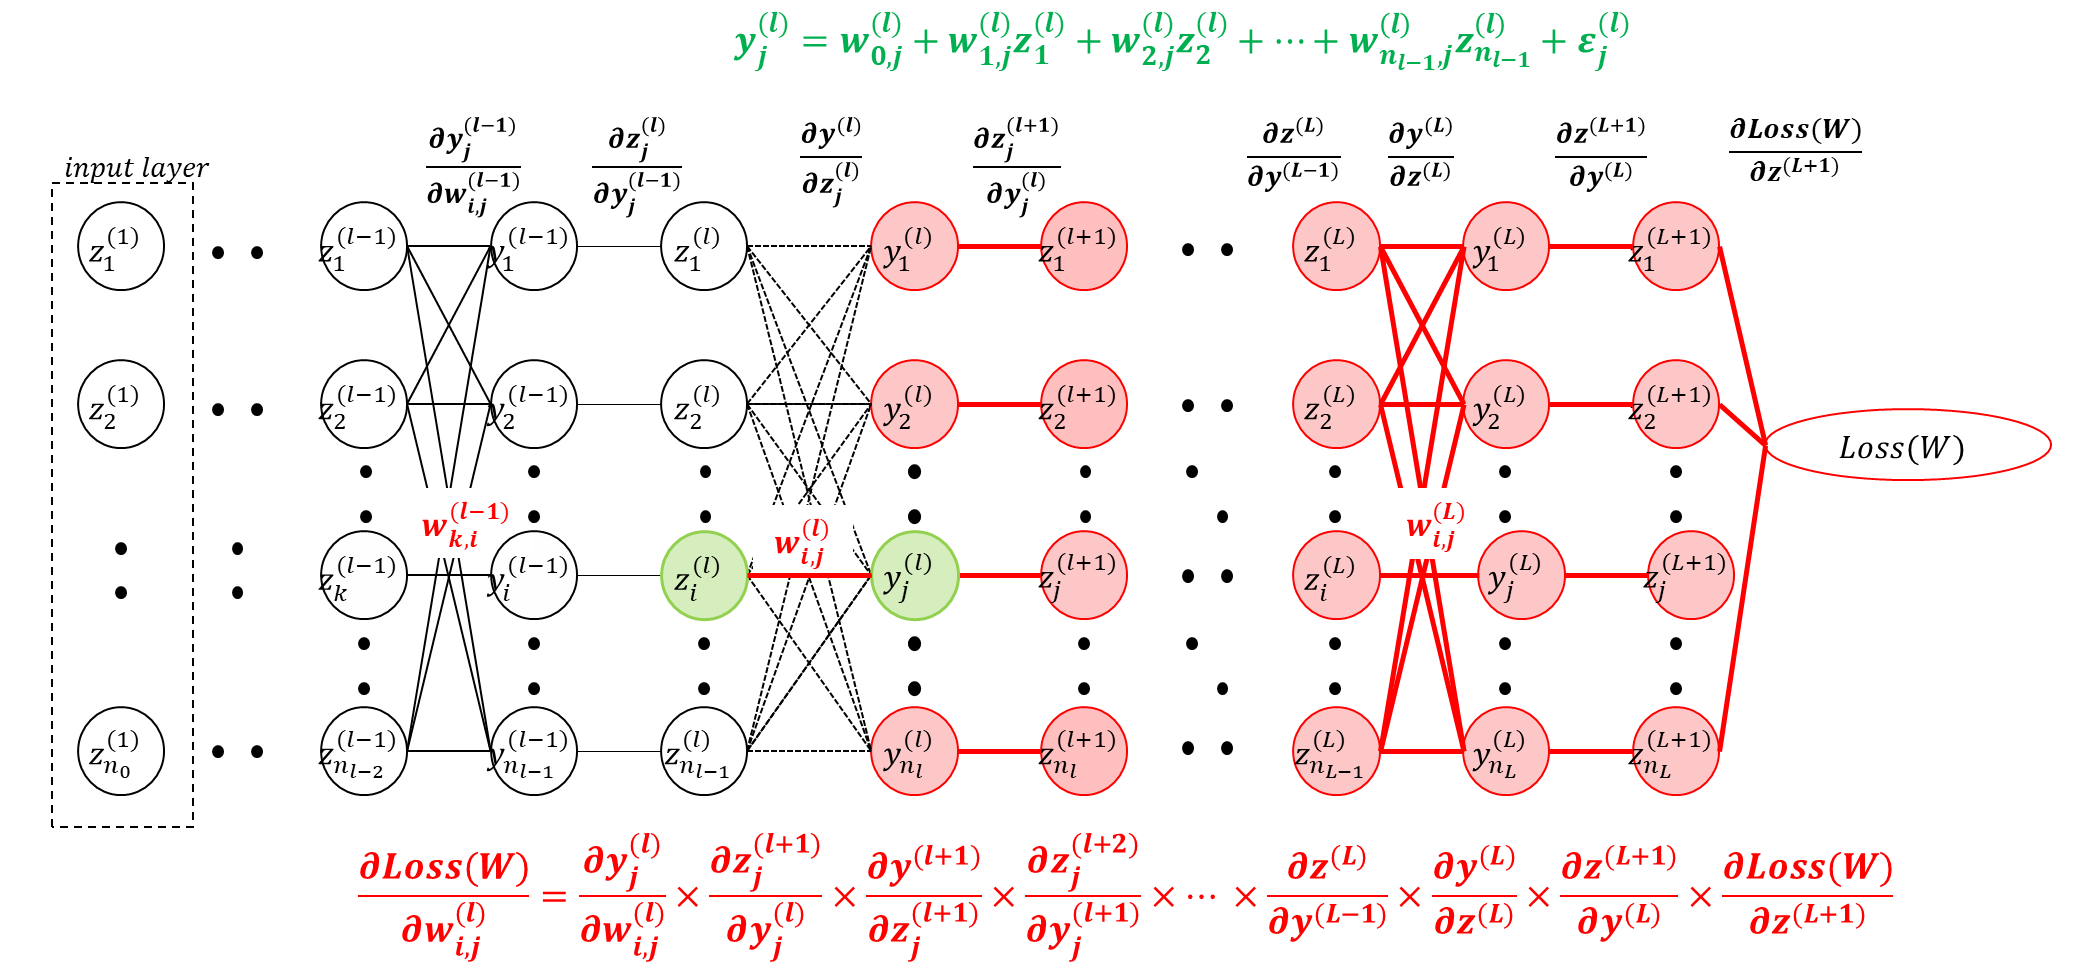

- $l^{th}$ hidden layer에서 Parameter $w_{i,j}^{(l)}$가 선형변환 결과인 $y_j^{(l)}$에 미치는 영향의 크기<br>

$$
\begin{align}
y_i^{(l)} =& w_{0,j}^{(l)} + w_{1,j}^{(l)}z_{1}^{(l)}+ w_{2,j}^{(l)}z_{2}^{(l)} + ... +                             {  \color{Red}{ w_{i,j}^{(l)} } } z_{i}^{(l)}  + ...+ w_{n_{l-1},j}^{(l)}z_{n_{l-1}}^{(l)} + \varepsilon_{j}^{(l)}  \\
y^{(l)} =& W^{(l)}z^{(l)} + \varepsilon^{(l)}
\end{align}
$$ 

$\qquad$ (i)  $\frac{  \partial  y_{j}^{(l)}  } { \partial w_{i,j}^{(l)} } = z_{i}^{(l)}$ <br><br>
$\qquad \ \ \ $      $\frac{\partial y^{(l)}}{\partial W^{(l)}} = z^{(l)}$
<br>
<br>
$\qquad$ (ii)$ \frac{\partial y_{j}^{(l)}}{\partial z_{i}^{(l)}} = w_{i,j}^{(l)}$ <br><br>
$\qquad \ \ \ $ $\frac{\partial y^{(l)}}{\partial z^{(l)}} = W^{(l)} $


### 2.3 Deep Neural Network의 비선형변환과 미분


- Activation Function을 이용한 비선형 변환<br>

$$
z_{j}^{(l+1)} = \sigma \left( \hat y_{j}^{(l)} \right)
$$<br>

- 비선형변환이 다음 단계에 미치는 영향<br>

$$
\frac{\partial z_{j}^{(l+1)}}{\partial \hat  y_{j}^{(l)}} = \frac{\partial \sigma \left( \hat  y_{j}^{(l)} \right)}{\partial \hat  y_{j}^{(l)}}
$$

$ \qquad $ $\checkmark \ $ 선택한 Activation Function에 따라 $\frac{\partial \sigma \left( \hat  y_{j}^{(l)} \right)}{\partial \hat  y_{j}^{(l)}}$ 값은 달라질 것임

#### (1) ReLU함수를 이용한 Non-linear Transformation과 미분함수

#####  $\quad$ (1.1) ReLU 함수

$$
z_j^{(l+1)}=
\begin{cases}
\hat y_j^{(l)}, &  if \ \ \hat y_j^{(l)} \ge 0 \\\\
0, &  if \ \ \hat y_j^{(l)} < 0 
\end{cases}
$$

#####  $\quad$ (1.2) ReLU 함수의 미분

$$
\frac{\partial  z_j^{(l+1)}}{\partial \hat y_j^{(l)}}=
\begin{cases}
1, &  if \ \ \hat y_j^{(l)} \ge 0 \\\\
0, &  if \ \ \hat y_j^{(l)} < 0 
\end{cases}
$$

#####  $\quad$ (1.3) ReLU함수의 순전파와 역전파

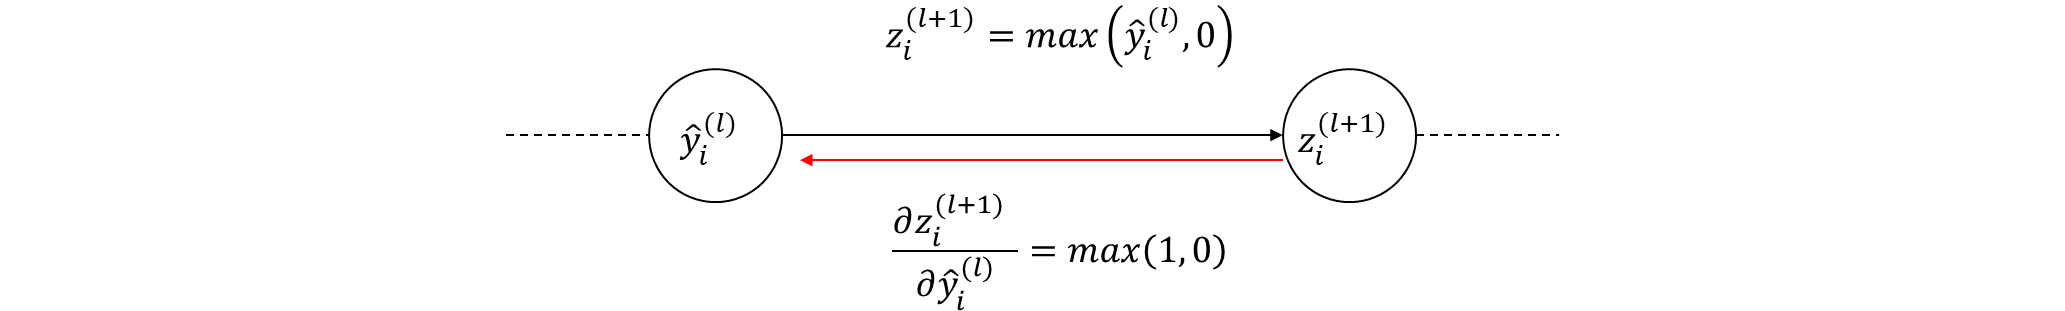

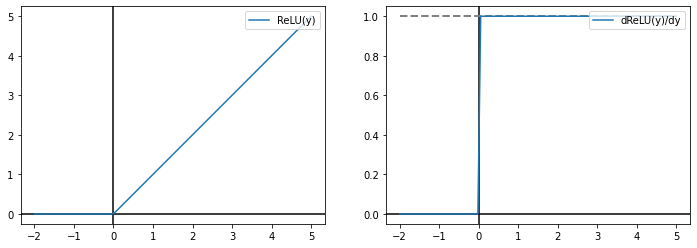

In [2]:
import numpy as np
import matplotlib.pyplot as plt

y_set = np.linspace(-2.0, 5.0, num=100)

def ReLU(x):
    if x > 0: 
        return x
    else: 
        return 0

def dReLU(x):
    if x > 0: 
        return 1
    else: 
        return 0
    
ReLU_y = np.array([ReLU(y) for y in y_set])
dReLU_y = np.array([dReLU(y) for y in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.plot(y_set, ReLU_y, label="ReLU(y)")
ax1.legend(loc='upper right')

ax2.axvline(x=0, color = 'k') # draw x =0 axes 
ax2.axhline(y=0, color = 'k') # draw y =0 axes
ax2.hlines( 1.0, -2.0, 5.0, color='gray', linestyle='--', linewidth=2)

ax2.plot(y_set, dReLU_y, label="dReLU(y)/dy")
ax2.legend(loc='upper right')

- 동일 간격인  $𝑦_𝑖^{(l)}$들에 대해 $𝑧_𝑖^{(l+1)}$들은 서로 다른 간격을 가짐<br>
$ \ \ $ $\checkmark \ $ 간격이 0 이거나 일정 간격을 유지함

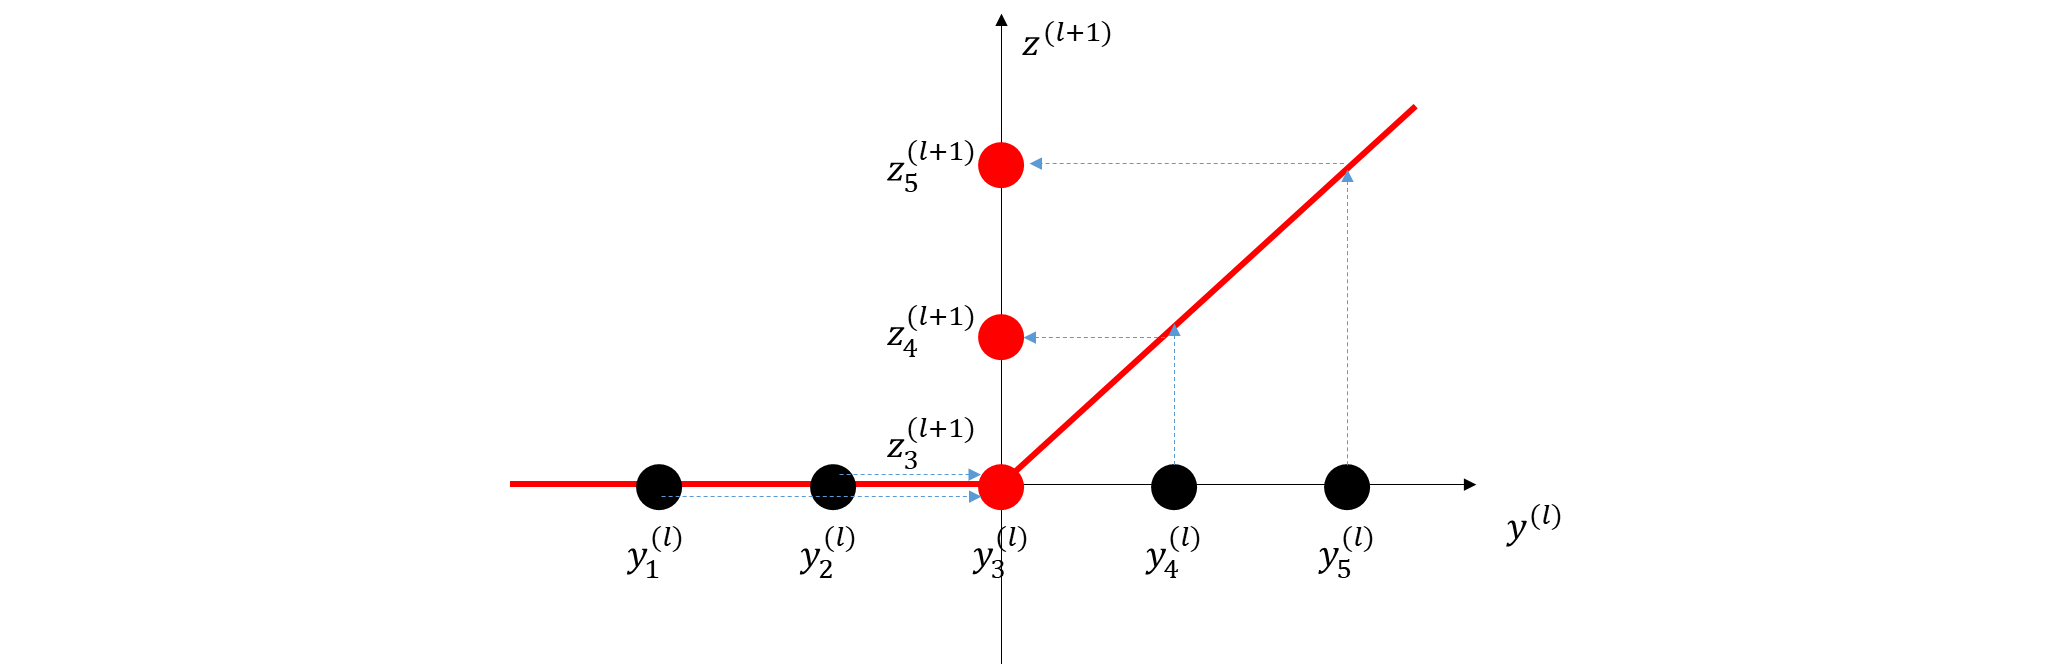

#### (연습 1)
$\qquad$ ReLU는 다음과 같이 정의되는 함수이다

$$
ReLU(y)=
\begin{cases}
y, & \mbox{$if \ y\ge 0 $} \\\\
0, & \mbox{$if \ y <0$}
\end{cases}
$$

$\qquad$ ReLU 함수의 미분함수 $\frac{\partial ReLU(y)}{\partial y}$를 구하시오

#### (2) Sigmoid 함수를 이용한 Non-linear Transformation과 미분함수

#####  $\quad$ (2.1) Sigmoid 함수

$$
z_i^{(l+1)} = \frac{1}{1+e^{- \hat y_i^ { \ (l)}}}
$$

#####  $\quad$ (2.2) Sigmoid 함수의 미분

$$
\frac{\partial  z_i^{(l+1)} }{\partial y_i^ { \ (l)}} =  z_i^{(l+1)} \left( 1 -  z_i^{(l+1)} \right)
$$

#####  $\quad$ (2.3) Sigmoid함수의 순전파와 역전파

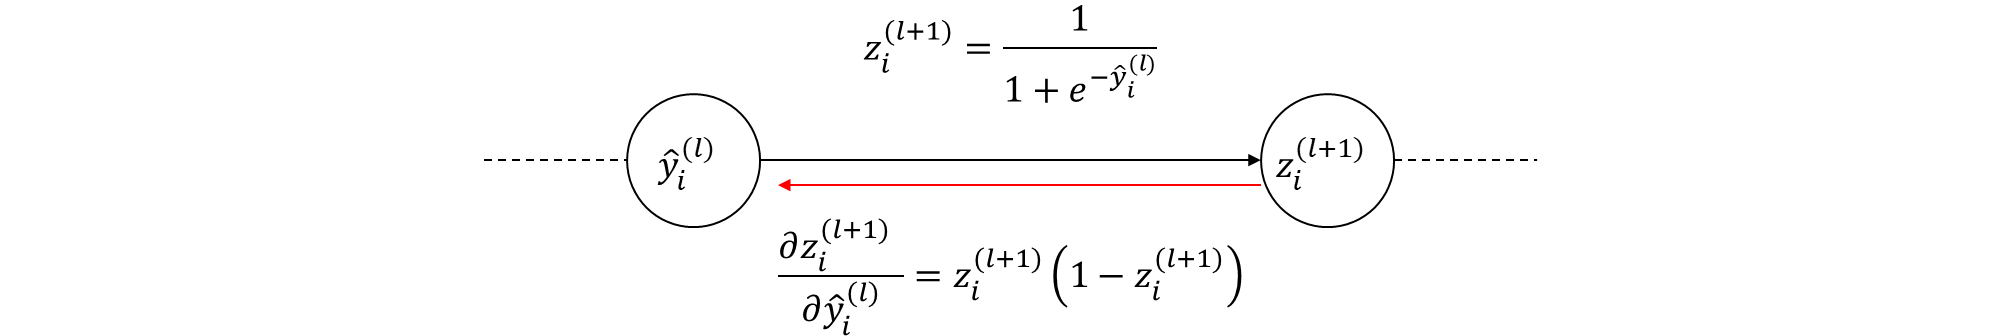

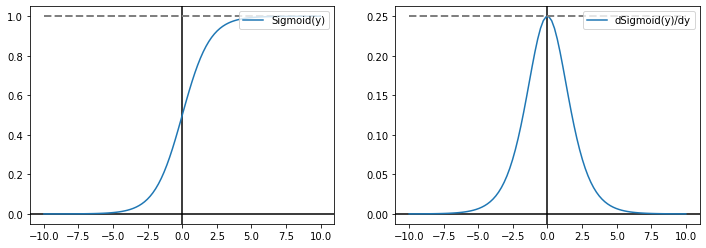

In [3]:
import numpy as np
import matplotlib.pyplot as plt

y_set = np.linspace(-10.0, 10.0, num=100)

def Sigmoid(y):
    return 1/(1 + np.exp(-y))

def dSigmoid(y):
    return Sigmoid(y)*(1-Sigmoid(y))
    
Sigmoid_y = np.array([Sigmoid(y) for y in y_set])
dSigmoid_y = np.array([dSigmoid(y) for y in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.hlines( 1.0, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax1.plot(y_set, Sigmoid_y, label="Sigmoid(y)")
ax1.legend(loc='upper right')

ax2.axvline(x=0, color = 'k') # draw x =0 axes 
ax2.axhline(y=0, color = 'k') # draw y =0 axes
ax2.plot(y_set, dSigmoid_y, label="dSigmoid(y)/dy")
ax2.hlines( 0.25, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax2.legend(loc='upper right')

- 일정 간격인 $𝑦_𝑖^{(𝑙)}$들에 대해 $𝑧_𝑖^{(𝑙+1)}$의 간격이 좁아지거나 넓어짐

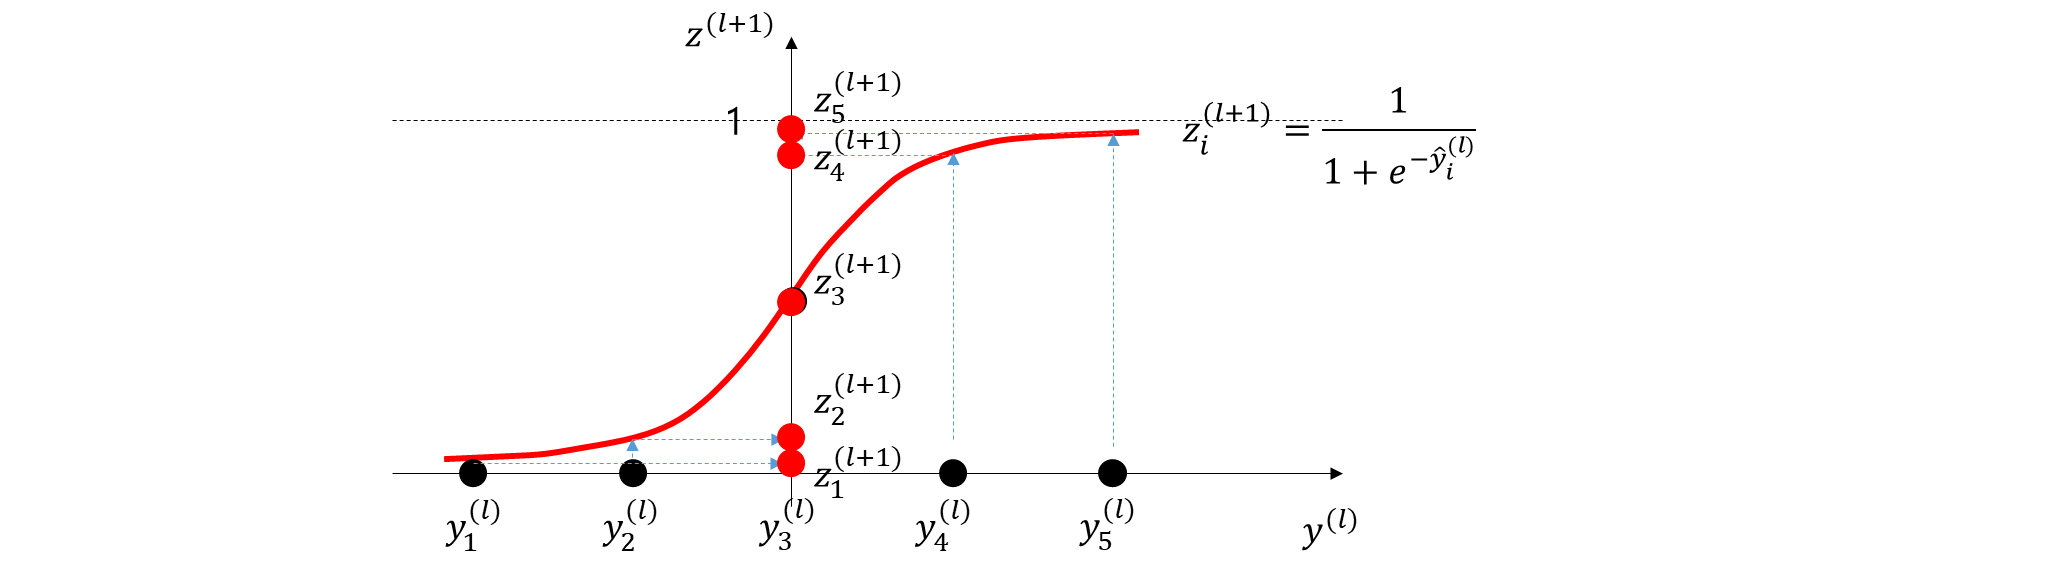

#### (연습 2)
$\qquad$ Sigmoid는 다음과 같이 정의되는 함수이다

$$
\sigma \left( \hat y \right) = \frac{1}{1+e^{- \hat y}}
$$

$\qquad$ Sigmoid 함수의 미분함수  $\frac{\partial ReLU \left( \hat y \right)}{\partial \hat y}$를 구하시오

#### (3) tanh 함수를 이용한 Non-linear Transformation과 미분함수

#####  $\quad$ (3.1) tanh 함수
$ \ \ $ $\checkmark \ $ $sinh(y) = \frac{e^y - e^{-y}}{2}$<br>
$ \ \ $ $\checkmark \ $ $cosh(y) = \frac{e^y + e^{-y}}{2}$<br>
$ \ \ $ $\checkmark \ $ $tanh(y) = \frac{sinh(y)}{cosh(y)} =   \frac{e^{y}-e^{-y}}{e^{y}+e^{-y}}$<br>

#####  $\quad$ (3.2) tanh 함수의 미분<br>

$$
\begin{align}
z_{i}^{(l+1)} &= tanh \left( \hat y_i^{(l)} \right) = \frac{e^{\hat y_i^{(l)}}-e^{- \hat y_i^{(l)}}}{e^{\hat y_i^{(l)}}+e^{- \hat y_i^{(l)}}} \\ \\
\frac{\partial z_{i}^{(l+1)} }{\partial \hat y_i^{(l)}} &= \frac{\partial \left( tanh \left( \hat y_i^{(l)} \right) \right) }{\partial \hat y_i^{(l)}} =  \frac{\partial}{\partial \hat y_i^{(l)}} \left(   \frac{e^{\hat y_i^{(l)}}-e^{- \hat y_i^{(l)}}}{e^{\hat  y_i^{(l)}}+e^{- \hat y_i^{(l)}}} \right) \\
                                     &= \left( 1-tanh \left(\hat  y_i^{(l)} \right) \right) \left( 1+tanh \left( \hat y_i^{(l)} \right) \right)  \\
                                     &= \left(1-z_{i}^{(l+1)} \right) \left(1+z_{i}^{(l+1)} \right) 
\end{align}
$$

#####  $\quad$ (3.3) tanh함수의 순전파와 역전파

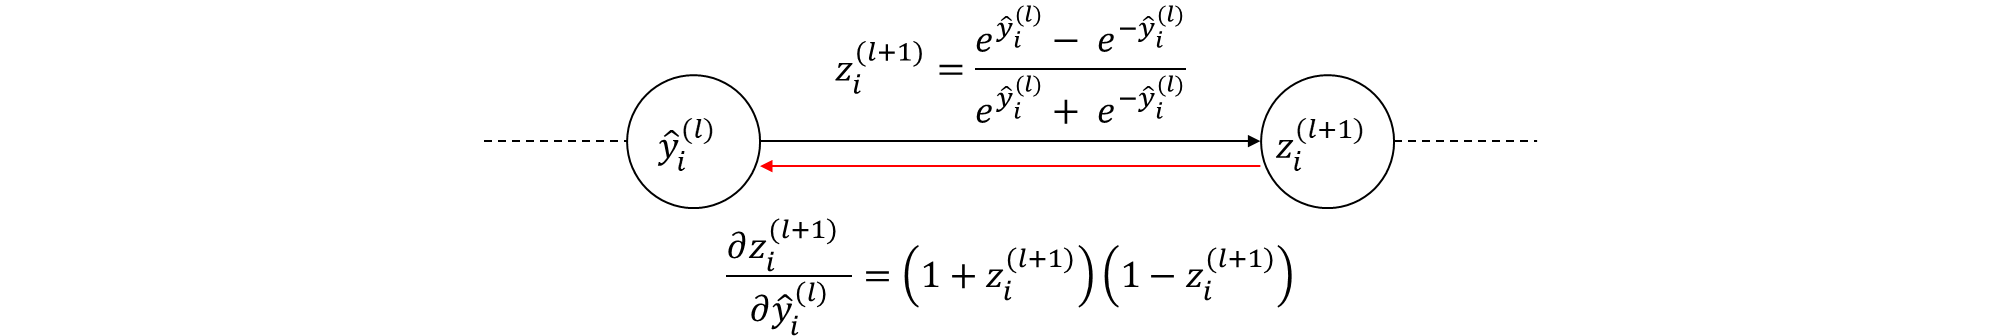

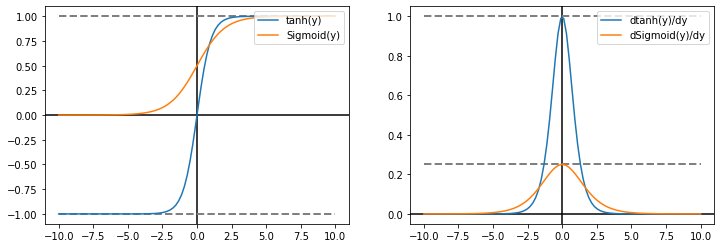

In [4]:
import numpy as np
import matplotlib.pyplot as plt

y_set = np.linspace(-10.0, 10.0, num=100)

def tanh(y):
    return (np.exp(y) - np.exp(-y))/(np.exp(y) + np.exp(-y))

def dtanh(y):
    return (1 - tanh(y)) * (1 + tanh(y))
    
tanh_y = np.array([tanh(y) for y in y_set])
dtanh_y = np.array([dtanh(y) for y in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.hlines( 1.0, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax1.hlines(-1.0, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax1.plot(y_set, tanh_y, label="tanh(y)")
ax1.plot(y_set, Sigmoid_y, label="Sigmoid(y)")
ax1.legend(loc='upper right')

ax2.axvline(x=0, color = 'k') # draw x =0 axes 
ax2.axhline(y=0, color = 'k') # draw y =0 axes
ax2.hlines( 1.0, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax2.hlines( 0.25, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax2.plot(y_set, dtanh_y, label="dtanh(y)/dy")
ax2.plot(y_set, dSigmoid_y, label="dSigmoid(y)/dy")
ax2.legend(loc='upper right')

- 일정 간격인 $𝑦_𝑖^{(𝑙)}$들에 대해 $𝑧_𝑖^{(𝑙+1)}$의 간격이 좁아지거나 넓어짐

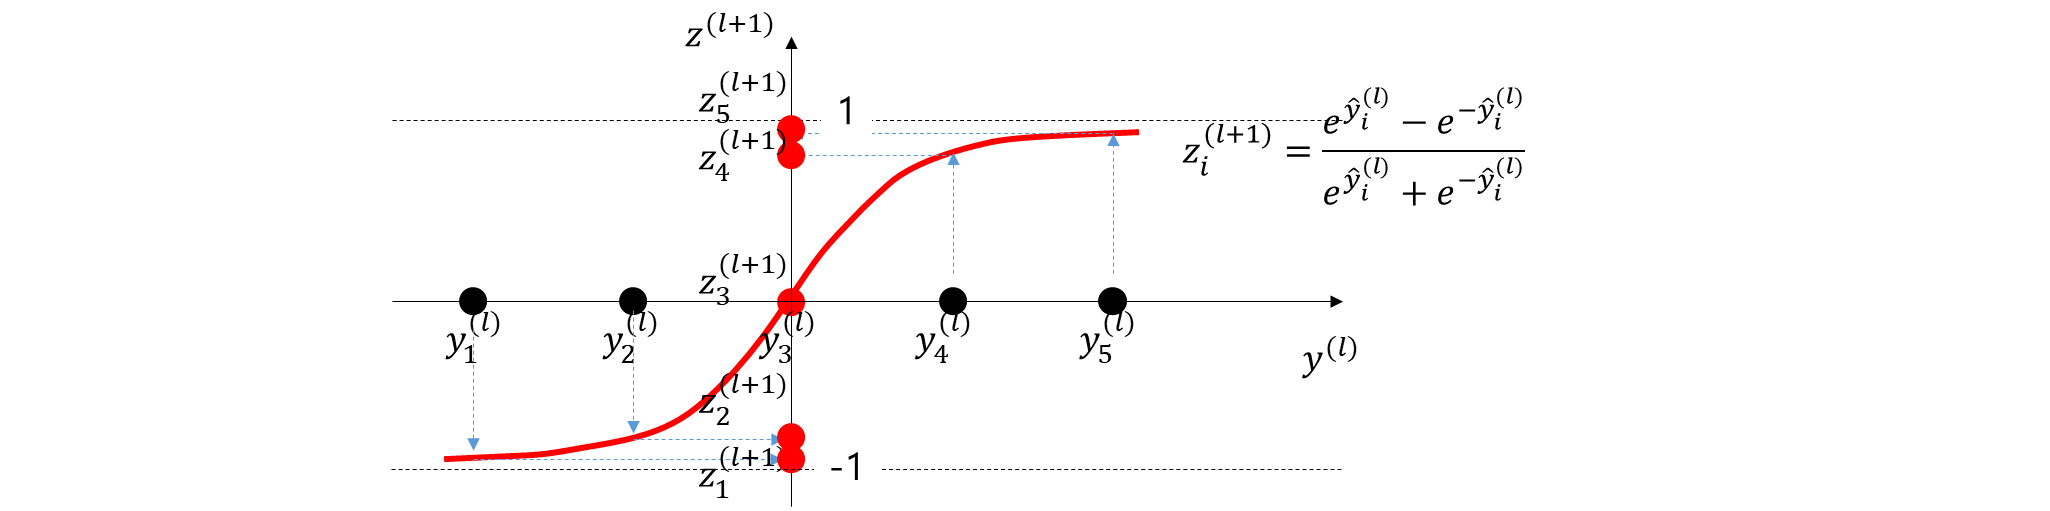

#### 연습 3
$ \ \ $ $\checkmark \ $ $sinhy = \frac{e^y - e^{-y}}{2}$<br>
$ \ \ $ $\checkmark \ $ $coshy = \frac{e^y + e^{-y}}{2}$<br>


$\qquad$ $tanh \left( \hat y \right)는 다음과 같이 정의되는 함수이다

$$ tanh\left( \hat y \right) = \frac{sinh\left( \hat y \right)}{cosh\left( \hat y \right)} =  \frac{e^{2 \hat y} - 1}{e^{2 \hat y} + 1}$$

$\qquad$ $tanh \left( \hat y \right)$의 미분함수 $\frac{\partial \ tanh \left( \hat y \right)}{\partial  \hat y}$를 구하시오

#### (4) Softmax 함수를 이용한 Non-linear Transformation과 미분함수

#####  $\quad$ (4.1) Softmax  함수

$$
\begin{align}
z_{i}^{(l+1)} &= Softmax \left( \hat y_i^{(l)} \right) = \frac{e^{ \hat y_i^{(l)}}}{\sum_{i=1}^{C}e^{\hat  y_i^{(l)}}}, \ \ C=Class의 수
\end{align}
$$

#####  $\quad$ (4.2) Softmax  함수의 미분<br>

$$
\begin{align}
\frac{\partial z_{i}^{(l+1)} }{\partial \hat y_i^{(l)}} &= \frac{\partial \left( Softmax \left( \hat y_i^{(l)} \right) \right) }{\partial \hat y_i^{(l)}} 
                             =  \frac{\partial }{\partial \hat y_i^{(l)}} \left(   \frac{e^{ \hat y_i^{(l)}}}{\sum_{i=1}^{C}e^{ \hat y_i^{(l)}}} \right) \\
                                     &= Softmax \left( \hat y_i^{(l)} \right) 
                                        \left( 1-Softmax \left( \hat y_i^{(l)} \right) \right) \\
                                     &= z_{i}^{(l+1)} \left( 1 -   z_{i}^{(l+1)} \right)   
\end{align}
$$

#####  $\quad$ (4.3) Softmax함수의 순전파와 역전파

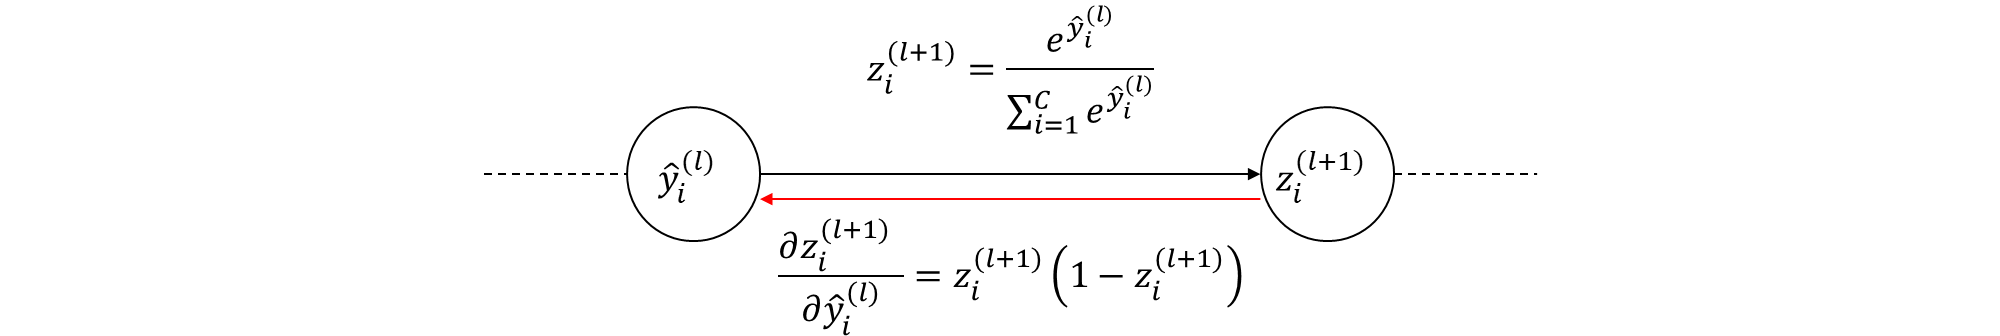

In [5]:
import numpy as np
import matplotlib.pyplot as plt

y_set = np.array([1, 3.2, 4.4, 1.5])

def softmax(y_set):
    y_set_exp = np.exp(y_set)
    sum = np.sum(y_set_exp)
    z = y_set_exp/sum
    return z

def dsoftmax(y_set):
    return softmax(y_set) * (1 - softmax(y_set))
    

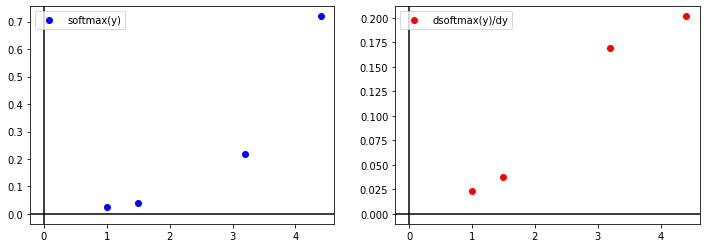

In [6]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.plot(y_set, softmax(y_set), 'ob', label="softmax(y)")
ax1.legend(loc='upper left')

ax2.axvline(x=0, color = 'k') # draw x =0 axes 
ax2.axhline(y=0, color = 'k') # draw y =0 axes
ax2.plot(y_set, dsoftmax(y_set), 'or', label="dsoftmax(y)/dy")
ax2.legend(loc='upper left')

#### 연습 4
$\qquad$ softmax() 함수는 다음과 같이 정의되는 함수이다

$$ Softmax \left( \hat y_i \right) = \frac{e^{ \hat y_i}}{\sum_{i=1}^{C}e^{ \hat y_i}}$$

$\qquad$ $Softmax( \hat y_i)$의 미분함수 $\frac{\partial Softmax \left( \hat y_i \right)}{\partial  \hat y}$를 구하시오

##### (5) Activation Function의 미분 요약

Activation <br> Function 이름 |  $\qquad \qquad $ Activation Function |  $\qquad \qquad \qquad$ Activation Function의 미분함수
:----:|:----|:----
<br>ReLU |  <br> $$ z^{(l+1)} = ReLU \left( \hat y^{(l)} \right) = \begin{cases} \hat y^{(l)}, & if \ \hat y^{(l)}>0  \\\\ 0, & \ if \ \hat y^{(l)}<0  \end{cases}$$ | <br>  $$ \frac{\partial z^{(l+1)}}{\partial \hat y^{(l)} } = \frac{ \partial ReLU \left( \hat y^{(l)} \right) }{ \partial  \left( \hat y^{(l)} \right) } = \begin{cases} 1, & if \ \hat y^{(l)}>0  \\\\ 0, & \ if \ \hat y^{(l)}<0  \end{cases}$$
<br>Sigmoid | <br> $$  z^{(l+1)} = Sigmoid \left( \hat y^{(l)} \right) = \frac{1}{1+ exp \left( -\hat  y^{(l)} \right)} $$ | <br> $$ \frac{\partial z^{(l+1)}}{\partial \hat y^{(l)} } = \frac{ \partial Sigmoid \left( \hat y^{(l)} \right) }{ \partial  \left( \hat y^{(l)} \right) } = z^{(l+1)} \left( 1 - z^{(l+1)} \right)$$
<br>tanh <br> (Hyperbolic Tangent) | <br> $$  z^{(l+1)} = tanh \left( \hat y^{(l)} \right) = \frac{e^{\hat y^{(l)}}- e^{- \hat y^{(l)}}}{e^{ \hat y^{(l)}}- e^{- \hat y^{(l)}}} $$ | <br> $$ \frac{\partial z^{(l+1)}}{\partial \hat y^{(l)} } = \frac{ \partial tanh \left( \hat y^{(l)} \right) }{ \partial  \left( \hat y^{(l)} \right) } = \left( 1 - z^{(l+1)} \right) \left( 1 + z^{(l+1)} \right) $$
<br>Softmax | <br> $\bullet \ $ Softmax는 마지막 hidden layer에 적용되는 함수임 $$  z_k^{(L+1)} = Softmax \left( \hat y_k^{(L)} \right) = \frac{exp \left( \hat y_k^{(L)} \right)}{\sum_{i=1}^{C} \hat  y_i^{(L)}}  $$ | <br> $$ \frac{\partial z_k^{(L+1)}}{\partial \hat y_i^{(L)} } = \frac{ \partial Softmax \left( z_k^{(L+1)} \right) }{ \partial  \left( \hat y_i^{(L)} \right) } = \begin{cases}  z_k^{(L+1)} \left( 1 - z_k^{(L+1)} \right), & if \ k=i  \\\\ - z_k^{(L+1)} z_i^{(L+1)}, & \ if \ k \neq i  \end{cases}$$

## 3. $w_{i,j}^{(l)}$이  $ Loss(W)$에 미치는 영향

- Parameter $ w_{i,j}^{(l)}$가 $Loss(W)$에 미치는 영향을 파악하는 것은 매우 중요 <br>
$ \ \ $ $\checkmark \ $ 왜냐하면 우리의 목적은 $Loss(W)$를 최소화하는 $w_{i,j}^{(l)}$들을 구하는 것임<br>

<span style="color:blue">
$$
\begin{align}
\underset{W} {minimize} \ \ & Loss(W) \\
s.t \quad & y = \sigma^{(L)}W^{(L)}...\sigma^{(2)}W^{(2)}\sigma^{(1)}W^{(1)} \left( z^{(1)} \right) + \varepsilon
\end{align}
$$
</span> <br>
$ \qquad $ $\checkmark \ $ 우리가 구하는  $ w_{i,j}^{(l)*}$는  $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } = 0$를 만족하는 $ w_{i,j}^{(l)*}$임<br>



- $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}}$를 구한다는 것은 다음과 같이 선형변환과 비선형변환을 반복하여 적용한 <span style="color:red">합성함수를 미분</span>하는 문제임

$$
w_{i,j}^{(l)} 
\underset{(1)}{\rightarrow} y_{j}^{(l)} 
\underset{(2)}{\rightarrow} z_{j}^{(l+1)} 
\underset{(1)}{\rightarrow} y^{(l+1)} 
\underset{(2)}{\rightarrow} z^{(l+2)}
\underset{(1)}{\rightarrow} y^{(L)} 
\underset{(2)}{\rightarrow}
\cdots
\underset{(1)}{\rightarrow} y^{(L)} 
\underset{(2)}{\rightarrow} z^{(L+1)}
\rightarrow Loss(W)
$$

$\quad$ $\checkmark \ $ 여기서 $(1)$은 선형변환이고, $(2)$는 activation function을 이용한 비선형변환임

- Chain Rule에 의한 $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  }$의 계산 순서<br>
<br>
$ \ \ $ $\checkmark \ $ $Loss(W)$에 가까운 parameter나 vector에 대한 미분계수부터 구함 <br>
$ \ \ $ $\checkmark \ $ 이전 단계에서 계산한 미분계수를 이용함

- $w_{i,j}^{(l)}$이  $ Loss(W)$에 미치는 영향 $\frac{\partial Loss (W)}{\partial w_{i,j}^{(l)}  }$의 계산<br>
$ \ \ $ $\checkmark \ $ Deep Neural Network의 architecture를 생각해 보면 쉽게 구할 수 있음

$$
\begin{align}
     \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } 
   =& \frac{\partial y_j^{(l)}        }{\partial w_{i,j}^{(l)}  }    \times 
     \frac{\partial z_{j}^{(l+1)}    }{\partial y_j^{(l)}     }    \times 
     \frac{\partial y^{(l+1)}        }{\partial z_j^{(l+1)}     }    \times  
     \frac{\partial z^{(l+2)}        }{\partial y^{(l+1)}     }    \times 
     \frac{\partial y^{(l+2)}        }{\partial z^{(l+2)}     }    \times  \cdots \times
     \frac{\partial y^{(L)}          }{\partial z^{(L)}       }    \times  
     \frac{\partial z^{(L+1)}        }{\partial y^{(L)}       }    \times 
     \frac{\partial Loss(W)}{\partial z^{(L+1)}     }   \\\\
=& \frac{ \partial y_{j}^{(l)}}{\partial w_{i,j}^{(l)} } \times
   \underbrace{ \left[
                   \frac{ \partial y^{(l+1)}}{\partial z_{j}^{(l+1)} } \times 
                    \frac{ \partial y^{(l+2)}}{\partial z_{j}^{(l+2)} } \times \cdots \times 
                    \frac{ \partial y^{(L)}}{\partial z^{(L)} }
                \right]}_{선형변환 \ 관련 \ 항들} \times
   \underbrace{ \left[ \frac{ \partial z_{j}^{(l+1)}}{ \partial y_{j}^{(l)} } \times
                   \frac{ \partial z^{(l+2)}}{ \partial y^{(l+1)} }  \times \cdots \times 
                   \frac{ \partial z^{(L+1)}}{ \partial y^{(L)} }
                \right]}_{비선형변환 \ 관련 \ 항들}
                \frac{ \partial Loss(W)}{ \partial z^{(L+1)} } 
\end{align}
$$<br>
<br>
$ \ \ $ $\checkmark \ $ $ \frac{ \partial y_{j}^{(l)}}{\partial w_{i,j}^{(l)} }= z_{i}^{(l)}$임<br><br>
$ \ \ $ $\checkmark \ $ $ \frac{ \partial y^{(k)}}{\partial z^{(k)} }= W^{(k)}$임<br><br>
$ \ \ $ $\checkmark \ $ $\frac{ \partial z^{(k+1)}}{ \partial y^{(k)} }$는 Activation function에 따라 다름<br><br>
$ \ \ $ $\checkmark \ $ $\frac{ \partial Loss(W)}{ \partial z^{(L+1)} }$는 선택한 Loss function에 따라 다름

## 4. Backpropagation Algorithm(역전파 알고리즘)

- 역전파 알고리즘은 Deep Neural Network의 출력인 $ \hat y \left( =z^{(L+1)} \right)$이  label $y$와 같아지도록 parameter $w_{i,j}^{(l)}$를 최적화하는 방법


- Parametr  $w_{i,j}^{(l)}$는  Gradient Descent를 이용하여 $\frac{ \partial w_{i,j}^{(l)}}{\partial w_{i,j}^{(l)}} = 0$가 되는 $w_{i,j}^{(l)*}$를 찾게 됨<br>

$$
w_{i,j}^{(l)} = w_{i,j}^{(l)} - \rho \left( \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}} \right), \ \ for \ all \ i, \ j, \ l 
$$ 


-  $1 \  epoch$란 Deep Neural Network에 포함된 모든 Parameter $w_{i,j}^{(l)}$들이 <br> 
$\quad \ $ (i) <span style="color:red">전체 dataset에 대해</span> <br>
$\quad \ $ (ii) <span style="color:red"> 모든 Parameter $w_{i,j}^{(l)}$들이 Gradient Descent로 1번 Update되는 것</span>을 말함

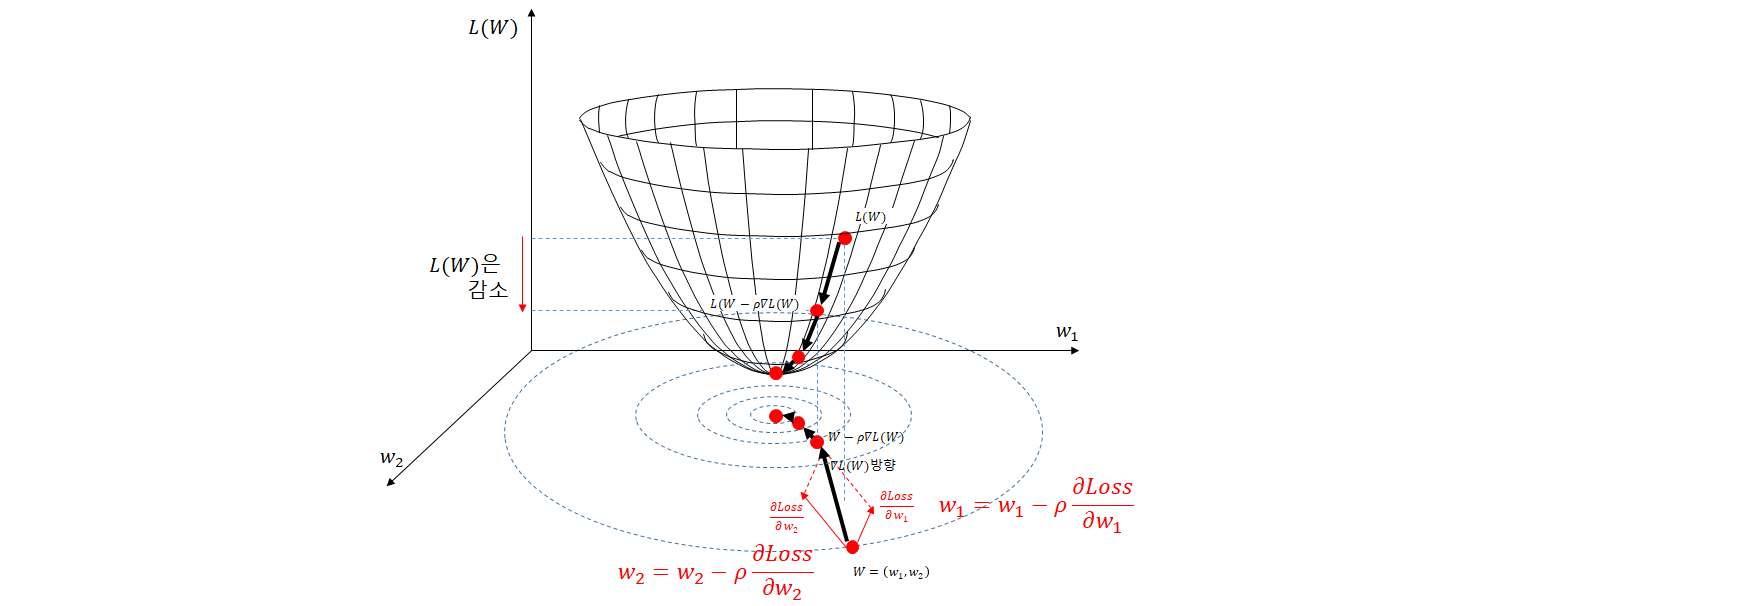

#### $\qquad$ [Backpropagation Algorithm]

>##### (Step 1) $N$개  Initial parameter들의 값  $W_0$, $epoch$수(Ter), $learning \ rate \ \rho$  결정
>- Initial parameter $W_0=\left( W_0^{(1)}, W_0^{(2)}, ..., W_0^{(L)} \right)$는 random하게 설정
>- input $z^{(1)}$과 $W_0$를 이용하여 $Loss \left( W_0 \right)$를 계산
>
>##### (Step 2) Chain Rule을 이용한  $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  }$ 계산
>$$
     \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } 
   = \frac{\partial y_j^{(l)}        }{\partial w_{i,j}^{(l)}  }    \times 
     \frac{\partial z_{j}^{(l+1)}    }{\partial y_j^{(l)}     }    \times 
     \frac{\partial y^{(l+1)}        }{\partial z_j^{(l+1)}     }    \times  
     \frac{\partial z^{(l+2)}        }{\partial y^{(l+1)}     }    \times 
     \frac{\partial y^{(l+3)}        }{\partial z^{(l+2)}     }    \times  \cdots \times
     \frac{\partial y^{(L)}          }{\partial z^{(L)}       }    \times  
     \frac{\partial z^{(L+1)}        }{\partial y^{(L)}       }    \times 
     \frac{\partial Loss(W)}{\partial z^{(L+1)}     }   
$$
>
>##### (Step 3) Parameter Update
>- Neural network에 포함된 $N$개의 parameter들은 다음 gradient descent를 통해 update됨
>
>$$
w_{i,j}^{(l)} = w_{i,j}^{(l)} - \rho  \left( \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}} \right)
$$
>
>##### (Step 4) $Loss$ Update
>- 이제 input $z^{(1)} = \left( z_{1}^{(1)}, z_{2}^{(1)}, \cdots. z_{n_{_0}}^{(1)} \right)$과 update된 $W$을 이용하여 다음의 식을 이용하여 output $z^{(L+1)}$과 $Loss(W)$를 계산
>
>$$
\begin{align}
& \hat y = \hat z^{(L+1)} \\
& \ \  = \sigma^{(L)} \hat W^{(L)}  \cdots \sigma^{(1)} \hat W^{(1)} \left( z^{(1)} \right) \\\\
& Loss(W) = Loss \left( y, \hat y \right)
\end{align}
$$
>
>- $epoch = epoch + 1$ 
>- $epoch < Ter$이면 Step 2로 
>- $epoch < Ter$이면 종료

### (연습문제) Backpropagation

- 다음과 같이 input과 weight parameter가 주어졌을 때 6개의 parameter를 학습시키시오<br>
$ \ \ $ $\checkmark \ $ Activation function은 Sigmoid를 사용<br>
$ \ \ $ $\checkmark \ $ Loss function은 MSE를 사용<br>
$ \ \ $ $\checkmark \ $ 단 학습률 $\rho=0.5$을 사용<br>
$ \ \ $ $\checkmark \ $ Label값은 $z_1^{(3)}=0.3$과 $z_2^{(3)}=0.9$임

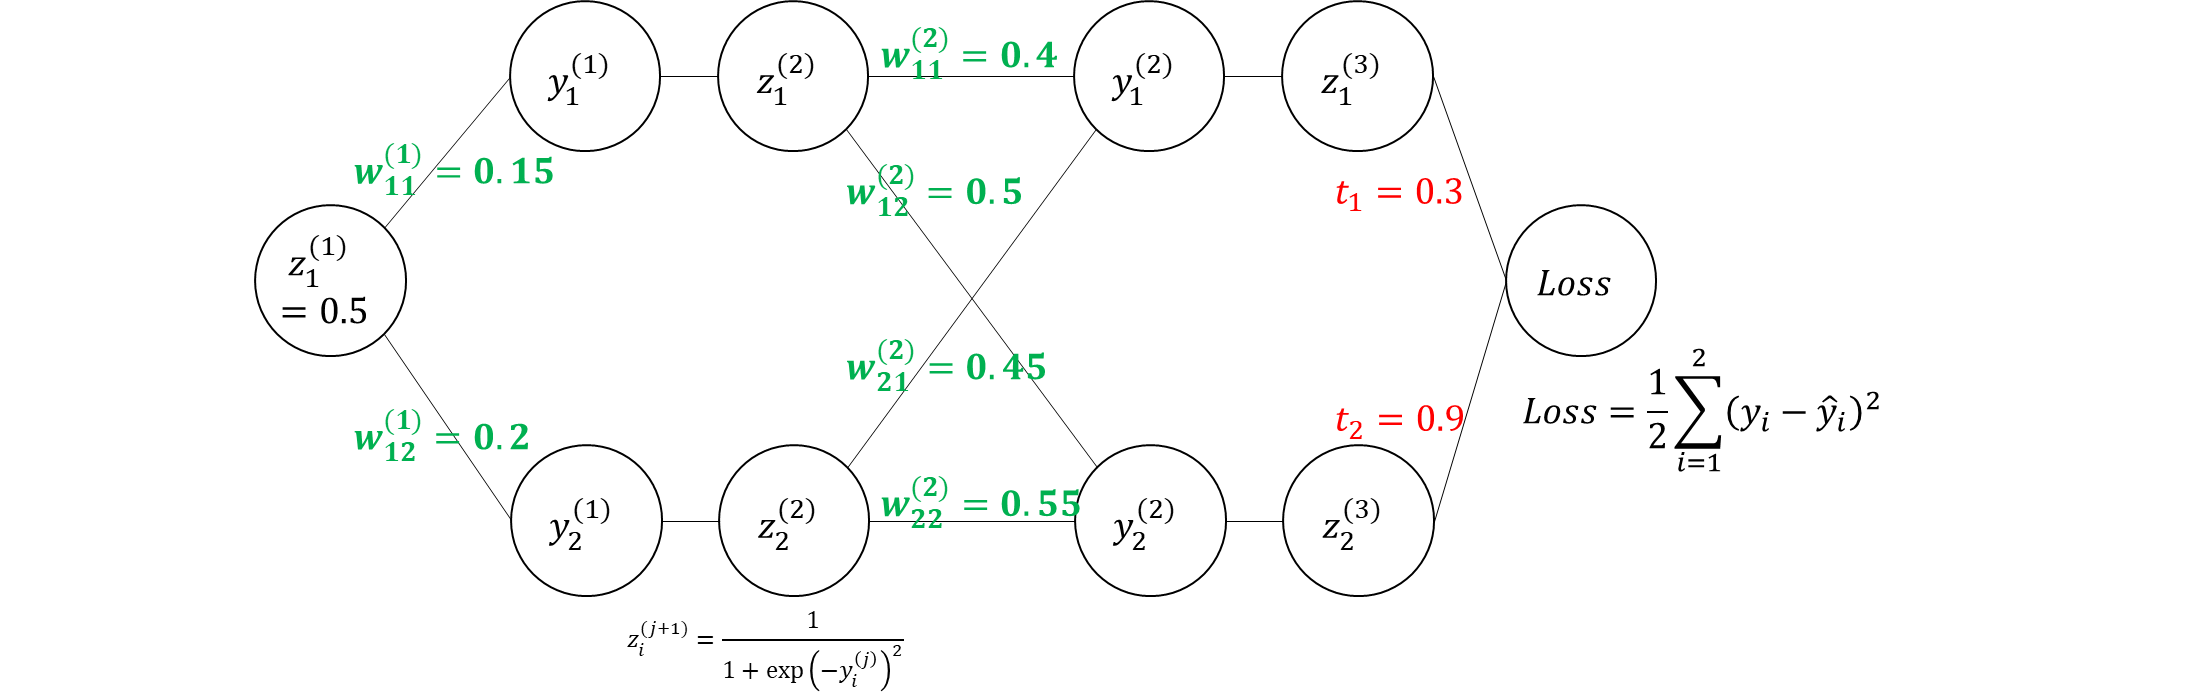

- Foreward Computation

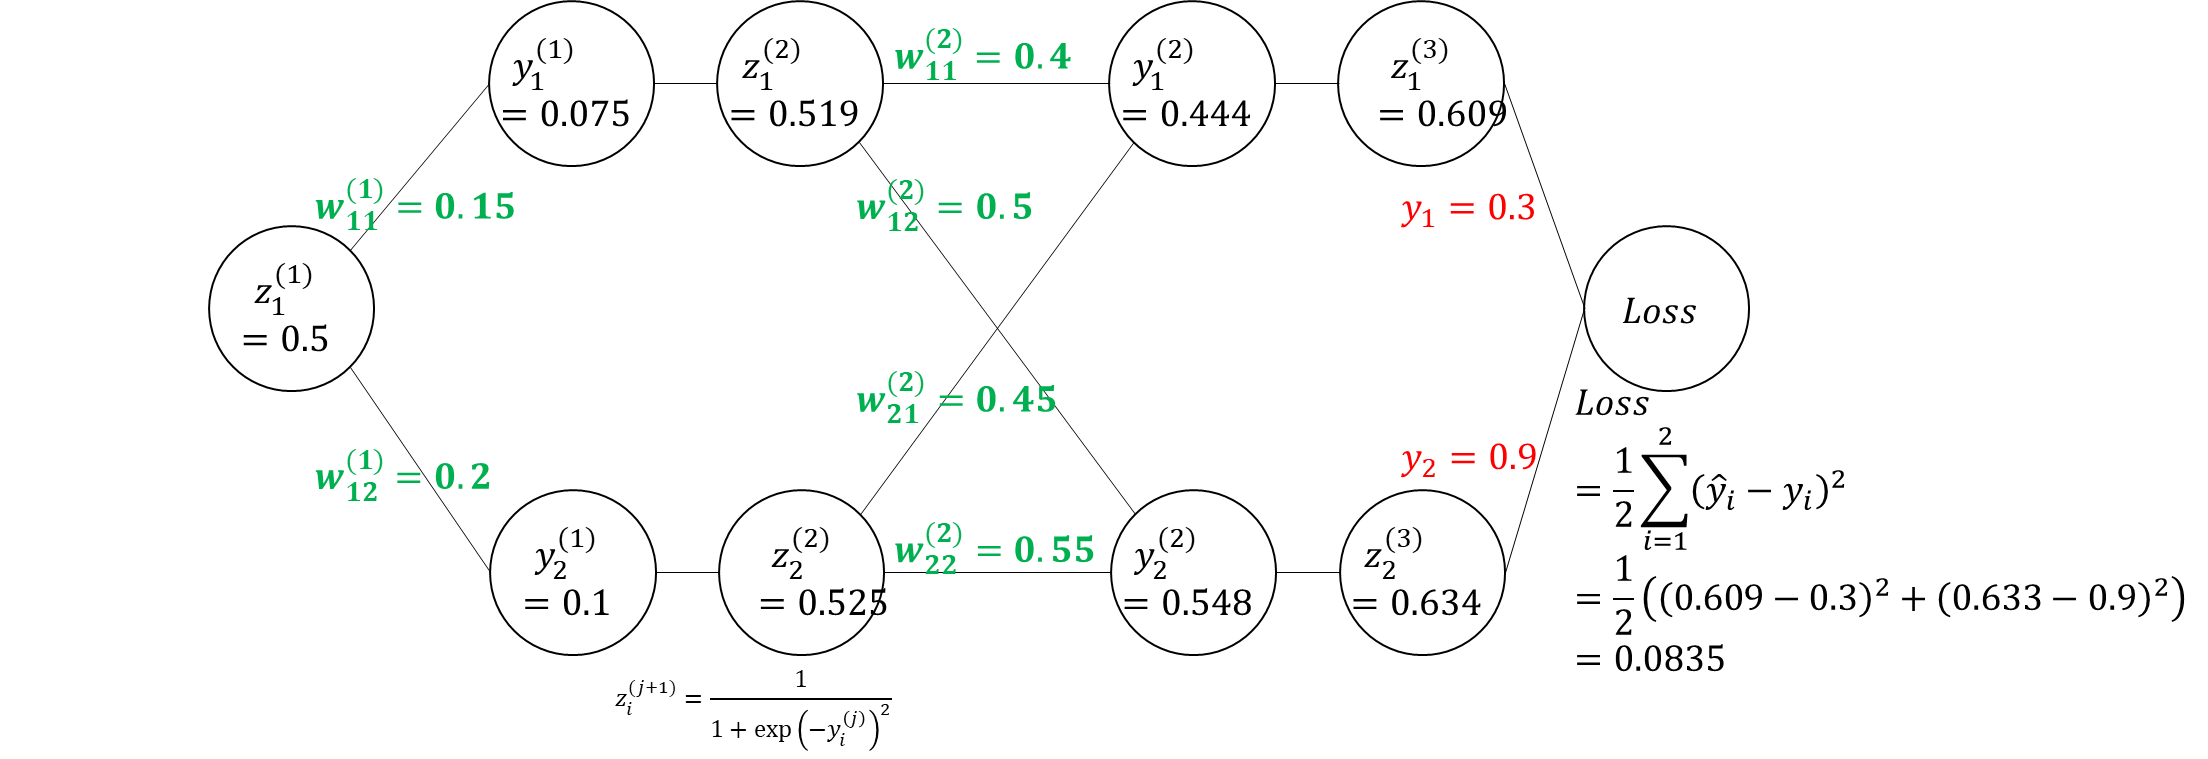

- 출력값을 어떻게 변화시키면 Label값과 비슷해지는지를 생각해 봄


$ \ \ $ $\checkmark \ $ 먼저 $w_{i,j}^{(l)}$에 다음과 같이 임의의 값을 부여함  <br>
$ \ \ $ $\checkmark \ $ 주어진 input과 먼저 $w_{i,j}^{(l)}$를 이용하여 Loss값을 계산<br>
$ \ \ $ $\checkmark \ $ Loss값을 줄이기 위한 Output이 가져야하는 값 등을 생각해 봄 

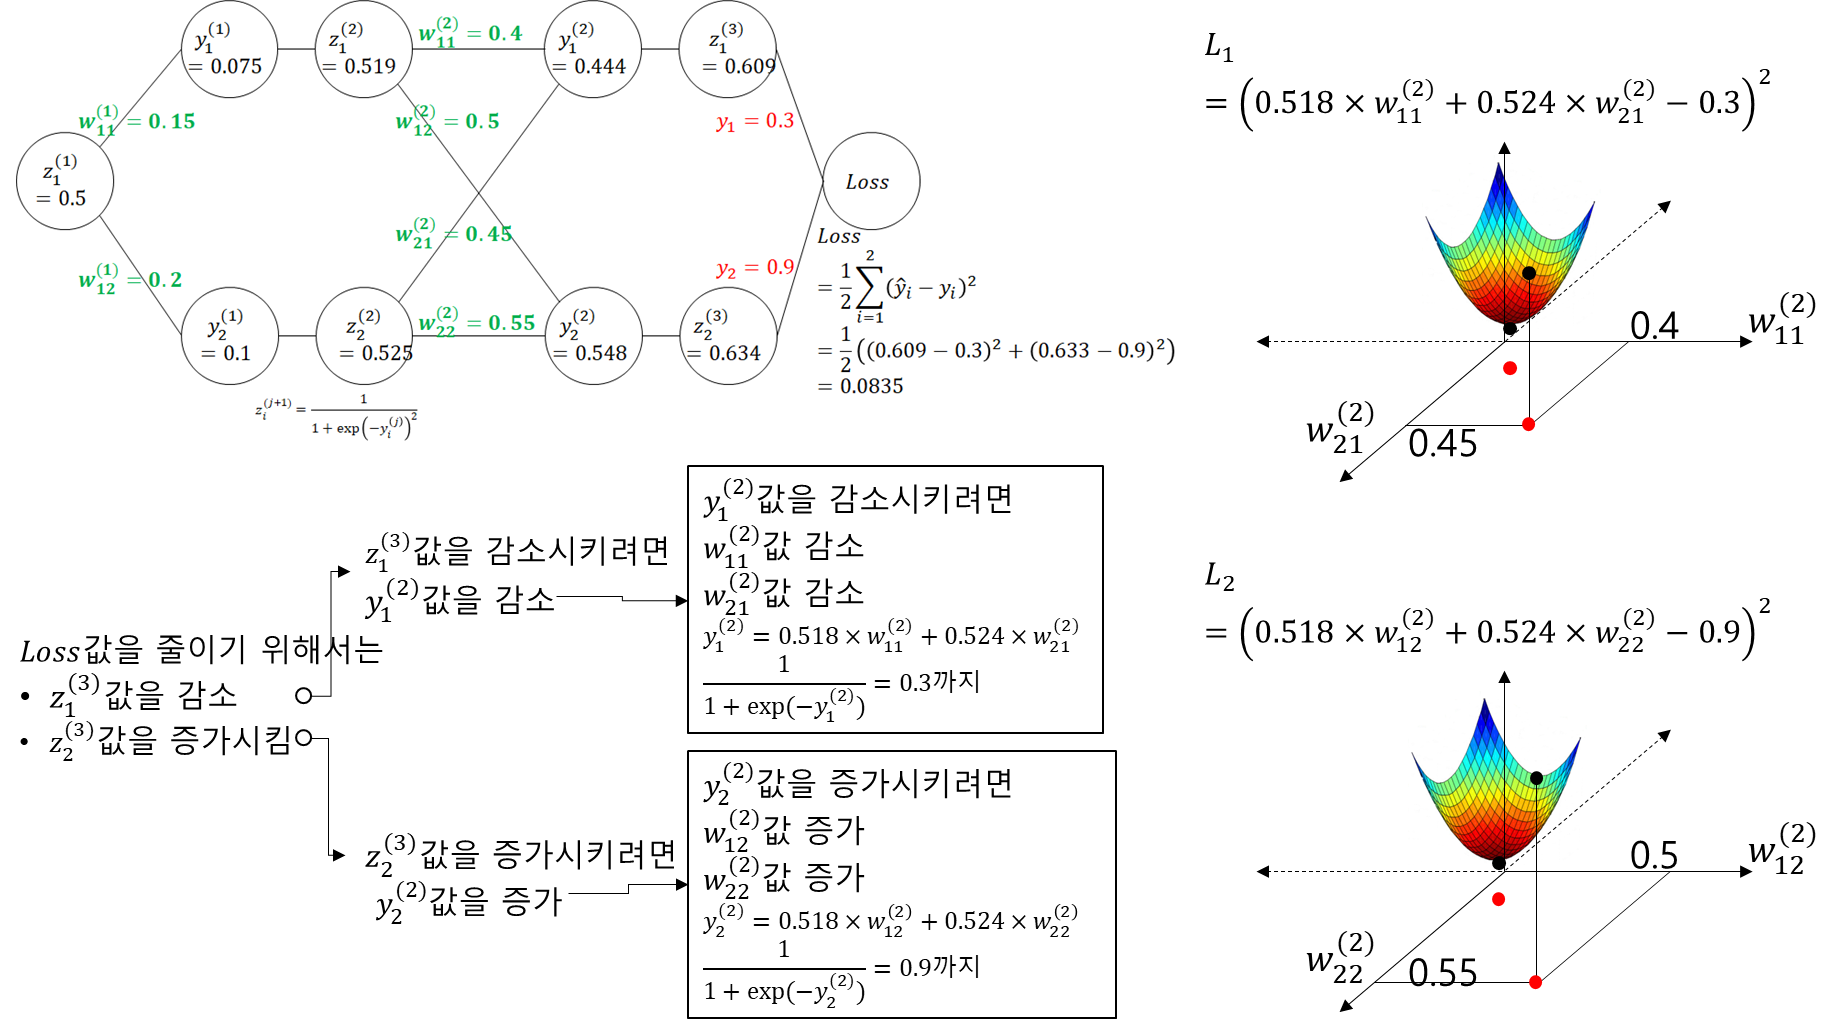

- 윗쪽 노란색 화살표 방향의 Backpropagation을 해보자

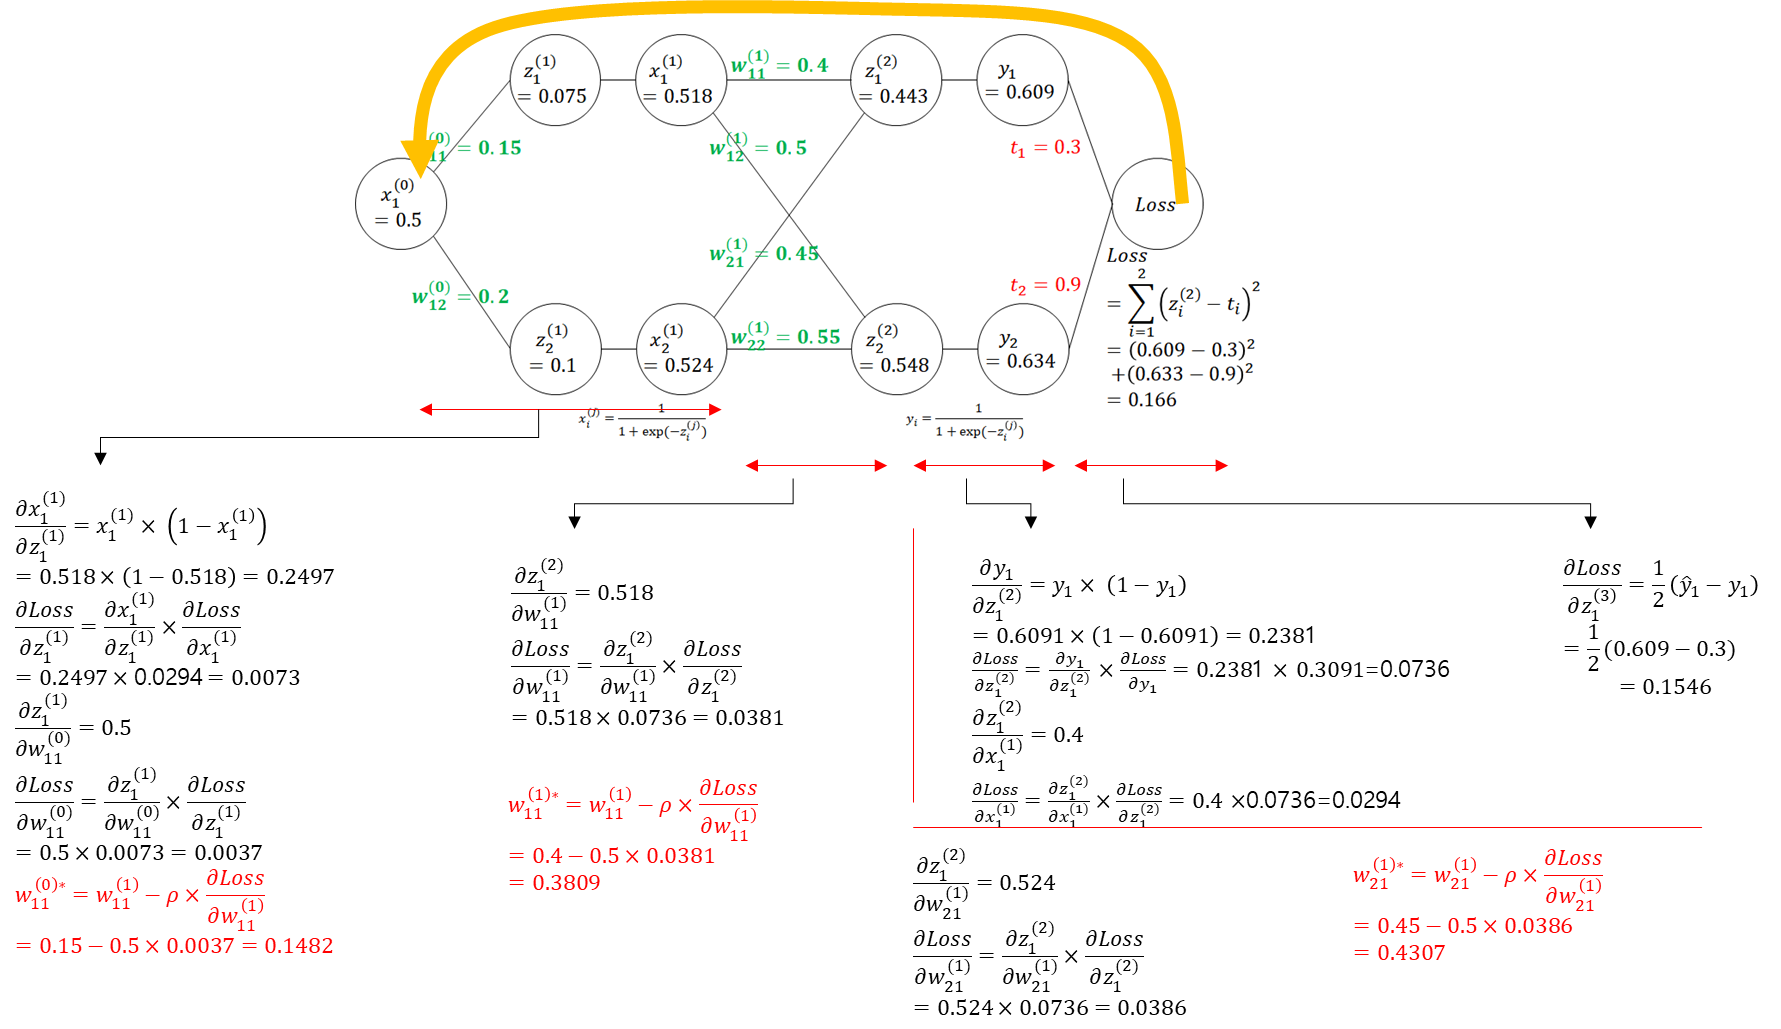

- 아랫쪽 노란색 화살표 방향의 Backpropagation을 해보자

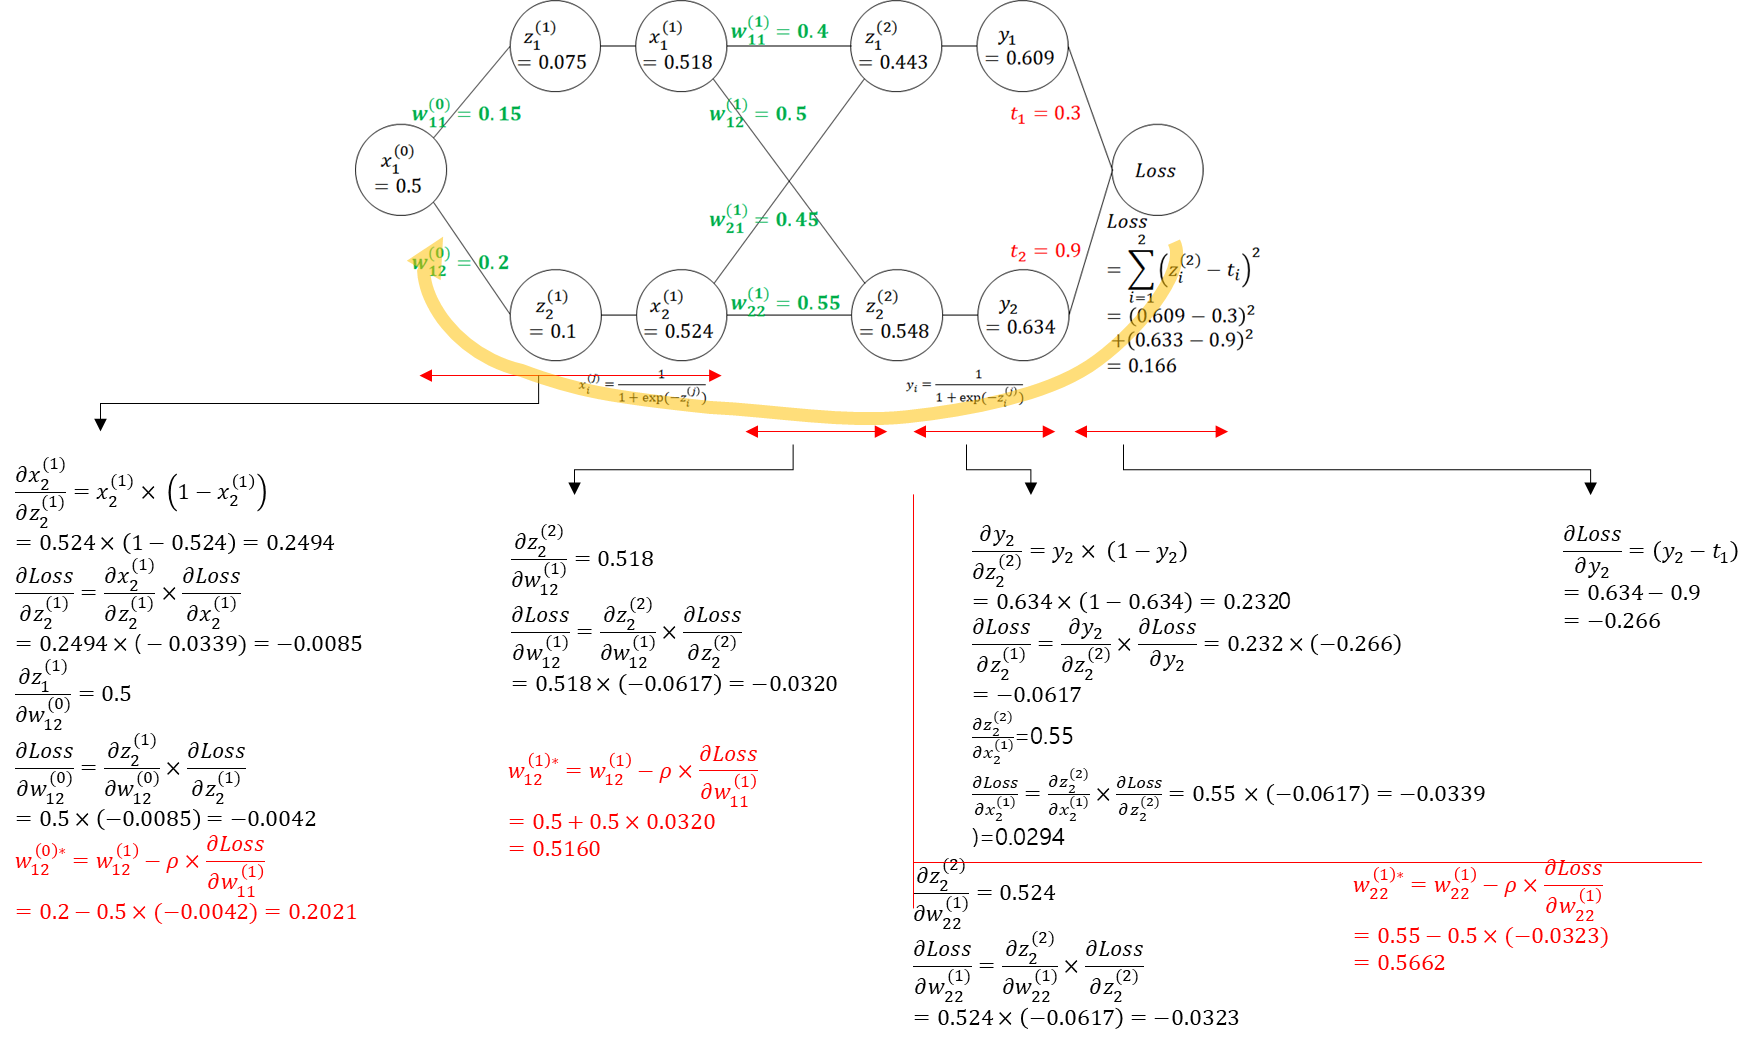

- 새로 Updat 된 $w_{i,j}^{(l)}$를 이용하여 Loss를 다시 게산하고<br>


- 위의 과정을 반복함

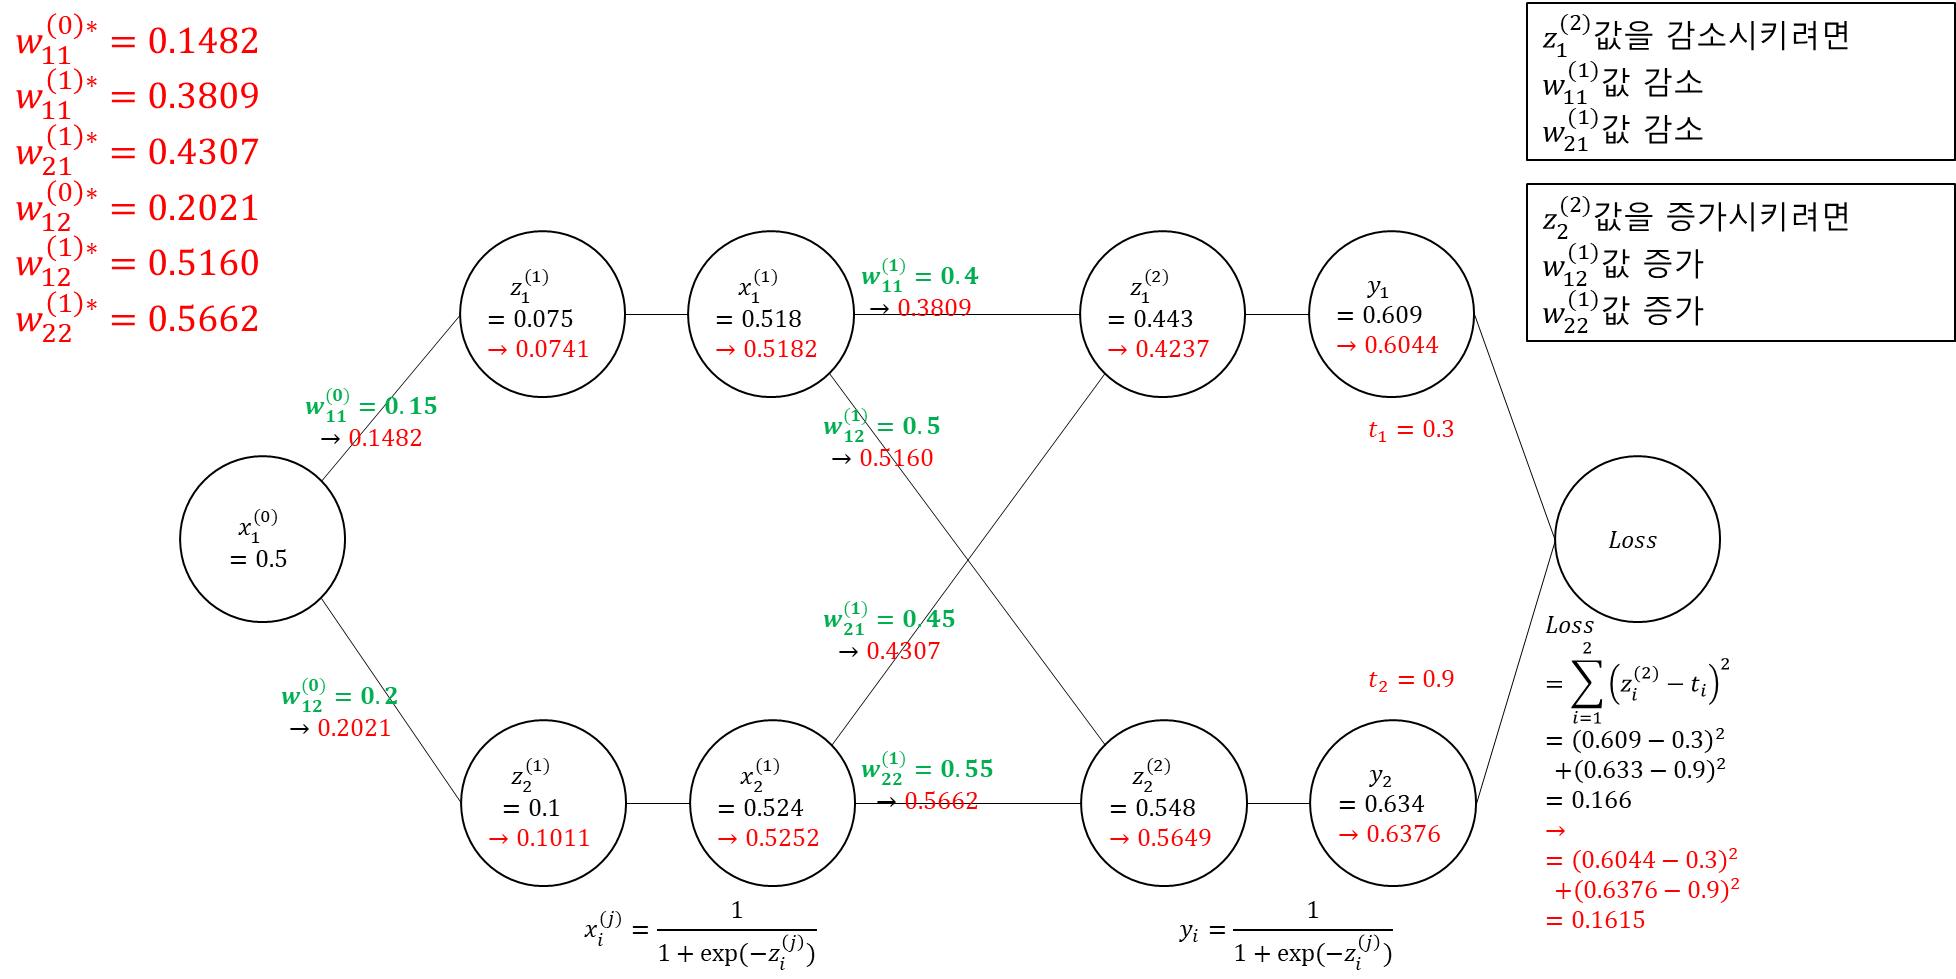